#### Shift+Tab for pulling up description on any object. Shift+Tab again for more information. Tab while typing inbuilt function parameter to autocomplete
#### Ctrl+Shift+P for pulling up menu of all functions
#### Ctrl+/ to comment blocks of lines

In [1]:
# Expands width to 100% of the ur window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%autosave 0

%matplotlib inline
#to open console
#%qtconsole


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys

from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
%run finished/imports.py
import glob

# pykalman is an external dependency, install on this kernel
'''
!pip install pykalman
import pykalman
!pip install tia
'''

Autosave disabled


'\n!pip install pykalman\nimport pykalman\n!pip install tia\n'

In [2]:
import pandas as pd
df=pd.DataFrame({'date':['20190211','20190211'],'time':['0100','0200']})
pd.to_datetime(df['date']  + df['time'], format='%Y%d%m%H%M')


0   2019-11-02 01:00:00
1   2019-11-02 02:00:00
dtype: datetime64[ns]

In [10]:
df = pd.read_csv(r'mktxtrace\2018History\mabondticker-20180102.csv')
[k for k in enumerate(df.columns.tolist())]

[(0, 'ISSUEPRICEID'),
 (1, 'SEQUENCENUMBER'),
 (2, 'ORIGINALSEQUENCENUMBER'),
 (3, 'ISSUEID'),
 (4, 'CUSIP'),
 (5, 'ISIN'),
 (6, 'NASDSYMBOL'),
 (7, 'PRICECHANGECODE'),
 (8, 'SALESCONDCODE'),
 (9, 'SECONDMODIFIER'),
 (10, 'WIFLAG'),
 (11, 'COMMISSIONFLAG'),
 (12, 'ASOFFLAG'),
 (13, 'SPECIALPRICEINDICATOR'),
 (14, 'QUANTITYINDICATOR'),
 (15, 'SELLERSALESDAYS'),
 (16, 'DATASOURCE'),
 (17, 'PRICE'),
 (18, 'YIELD'),
 (19, 'YIELDDIRECTION'),
 (20, 'QUANTITY'),
 (21, 'ESTIMATEDQUANTITY'),
 (22, 'EFFECTIVEDATE'),
 (23, 'EFFECTIVETIME'),
 (24, 'REPORTDATE'),
 (25, 'REPORTTIME'),
 (26, 'HALT'),
 (27, 'CANCELFLAG'),
 (28, 'CORRECTIONFLAG'),
 (29, 'BENCHMARKSPREAD'),
 (30, 'BENCHMARKISSUEID'),
 (31, 'BENCHMARKCUSIP'),
 (32, 'BENCHMARKISIN'),
 (33, 'BENCHMARKTICKER'),
 (34, 'BENCHMARKCOUPON'),
 (35, 'BENCHMARKMATURITY'),
 (36, 'OASSPREAD'),
 (37, 'PARSPREAD'),
 (38, 'MKTSPREAD'),
 (39, 'ISPREAD'),
 (40, 'IS_SUSPECT'),
 (41, 'TICKER'),
 (42, 'COUPON'),
 (43, 'MATURITY'),
 (44, 'CHANGEDAYSPREAD'),
 

#### Cloudquant results

In [629]:
from IPython.display import HTML, display, Markdown

from bokeh.core.properties import value as bokeh_value
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.layouts import column, row
from bokeh.models import NumeralTickFormatter, HoverTool, FactorRange

import datetime
import dateutil
import glob
import h5py
import imp
#from itertools import izip
import numpy as np
import pandas as pd 
import pytz
import time
import sys

output_notebook()

Loading BokehJS ...

In [634]:
# Read and prepare portfolio summary data
# The summary data should aggregate all symbols' data per day
portfolios = pd.read_csv('C://backtest//wq//Report - ALL_2x//ALL_2x//data_files//portfolios.csv')
portfolios['date'] = pd.to_datetime(portfolios['date']).dt.date
g = portfolios.groupby('date')
portfolios = g.sum()

#Each of the data fields must be "float"ed because in the extraction, they are
#  turned into "object" types. Don't know why.
figure_data = {
    "date": portfolios.index.values.astype('str'),
    #commission should be negated because it is being subtracted from total P&L
    "Total Commission and Fees": -portfolios['commission_total'].cumsum().values.astype('float'),
    "Realized Entry P&L": portfolios['realized_entry_pl'].cumsum().values.astype('float'),
    "Realized MTM P&L": portfolios['realized_mtm_pl'].cumsum().values.astype('float'),
    "Unrealized Entry P&L": portfolios['unrealized_entry_pl'].values.astype('float'),
    "Unrealized MTM P&L": portfolios['unrealized_mtm_pl'].cumsum().values.astype('float'),
}

figure_data["Total Entry P&L w/o Commission"] = figure_data["Unrealized Entry P&L"] + figure_data["Realized Entry P&L"]
figure_data["Total MTM P&L w/o Commission"] = figure_data["Unrealized MTM P&L"] + figure_data["Realized MTM P&L"]
figure_data["Total P&L w/o Commission"] = figure_data["Realized Entry P&L"] + figure_data["Unrealized Entry P&L"]
figure_data["Total P&L"] = figure_data["Realized Entry P&L"] + figure_data["Unrealized Entry P&L"] + figure_data['Total Commission and Fees']

figure_data = pd.DataFrame({'date':portfolios.index.values.astype('str'),
                            "Total Commission and Fees": -portfolios['commission_total'].cumsum().values,
                            "Realized Entry P&L": portfolios['realized_entry_pl'].cumsum().values,
                            "Realized MTM P&L": portfolios['realized_mtm_pl'].cumsum().values,
                            "Unrealized Entry P&L": portfolios['unrealized_entry_pl'].values,
                            "Unrealized MTM P&L": portfolios['unrealized_mtm_pl'].cumsum().values})

figure_data["Total Entry P&L w/o Commission"] = figure_data["Unrealized Entry P&L"] + figure_data["Realized Entry P&L"]
figure_data["Total MTM P&L w/o Commission"] = figure_data["Unrealized MTM P&L"] + figure_data["Realized MTM P&L"]
figure_data["Total P&L w/o Commission"] = figure_data["Realized Entry P&L"] + figure_data["Unrealized Entry P&L"]
figure_data["Total P&L"] = figure_data["Realized Entry P&L"] + figure_data["Unrealized Entry P&L"] + figure_data['Total Commission and Fees']
figure_data
portfolios.columns.tolist()

['buy_shares',
 'commission_total',
 'corporate_action',
 'corporate_action_dividend',
 'corporate_action_remainder_shares',
 'corporate_action_shares',
 'eod_entry_price',
 'eod_position',
 'eod_price',
 'fee_brokerage',
 'fee_clearing',
 'fee_exchange',
 'fee_regulatory',
 'realized_entry_pl',
 'realized_mtm_pl',
 'rebate_exchange',
 'sell_shares',
 'sod_mtm_price',
 'sod_position',
 'total_net_entry_pl',
 'total_net_mtm_pl',
 'unrealized_entry_pl',
 'unrealized_mtm_pl']

#### Simple time series forecasting with Keras RNN

In [122]:
#Deeplearning with Keras, Tensorflow
#Simple time series forecasting
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = 2**array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = 2**array([7, 8, 9])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)
X.shape

[[1050.3287]]


(6, 3, 1)

In [625]:
#adapting rnn using keras for 3 input arrays for every output
#X = np.array([x for x in zip(np.linspace(-1,1,100),np.linspace(1,1,100),np.linspace(-1,1,100))])

import itertools
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = np.array([x for x in itertools.product(np.linspace(-1,1,10),np.linspace(-1,1,10),np.linspace(-1,1,10))])

#this function is not visible to the neural net model - it has to try and figure out the closest fit with only the train data
y = [2*x[0]+5*x[1]+10*x[2]+np.random.random()for x in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

model = Sequential()
model.add(LSTM(3, activation='relu', return_sequences=True, input_shape=(3,1)))
model.add(LSTM(3, activation='relu', return_sequences=True, input_shape=(3,1)))
model.add(LSTM(3, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X_train, y_train, epochs=50, verbose=0,validation_data=(X_test,y_test))



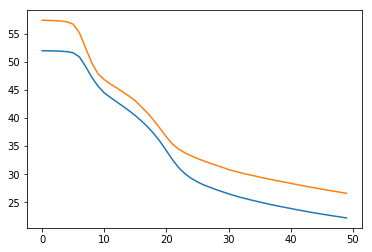

In [626]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [627]:
x_input = array([-0.5,-0.25,0.9,-0.5,-0.25,-0.9])
x_input = x_input.reshape((2, 3,1))
yhat = model.predict(x_input, verbose=0)
yhat


array([[  1.2317333],
       [-11.450257 ]], dtype=float32)

In [277]:
model.summary()
[2*x[0]+5*x[1]+10*x[2] for x in array([[-0.5,-0.25,0.9],])]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_180 (LSTM)              (None, 3, 3)              60        
_________________________________________________________________
lstm_181 (LSTM)              (None, 3, 3)              84        
_________________________________________________________________
lstm_182 (LSTM)              (None, 3)                 84        
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 4         
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


[6.75]

0.9935764065176292

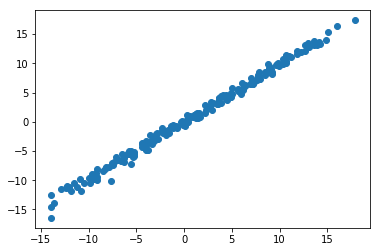

In [263]:
#n=6,n_epoch=50
yhat = model.predict(X_test,steps=1)
# plt.scatter(y_train,yhat)
plt.scatter(y_test,yhat)
sm.OLS(y_test, yhat).fit().rsquared

0.9950914282794129

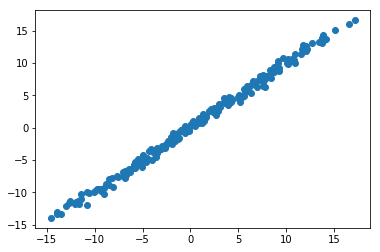

In [278]:
#n=3,n_epoch=40
yhat = model.predict(X_test,steps=1)
# plt.scatter(y_train,yhat)
plt.scatter(y_test,yhat)
sm.OLS(y_test, yhat).fit().rsquared

0.9726305977928034

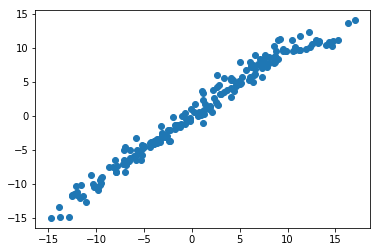

In [273]:
#n=3,n_epoch=20
yhat = model.predict(X_test,steps=1)
# plt.scatter(y_train,yhat)
plt.scatter(y_test,yhat)
sm.OLS(y_test, yhat).fit().rsquared

In [102]:
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
# load and clean-up data
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

# fill missing values with a value at the same time one day ago
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]

# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# mark all missing values
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')
# fill missing
fill_missing(dataset.values)
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [104]:
# resample minute data to total for each day
from pandas import read_csv
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16            5180.8             0.0           546.0          4926.0   
2006-12-17           14398.6          2033.0          4187.0         13341.0   
2006-12-18            9247.2          1063.0          2621.0         14018.0   
2006-12-19            7094.0           839.0          7602.0          6197.0   
2006-12-20            9313

lstm: [394.252] 411.6, 414.3, 369.4, 377.2, 398.4, 315.9, 458.0


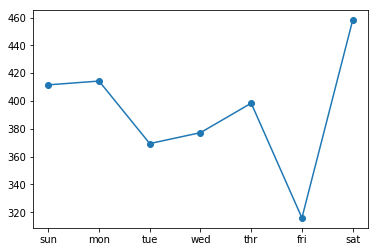

In [105]:
# univariate multi-step lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 70, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 7
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

In [ ]:
#use tqdm to show progress in a pandas merge operation
import pandas as pd
from tqdm import tqdm

df1 = pd.DataFrame({'l': 1000*['a', 'b', 'c', 'd'],'lvalue': np.random.randint(0, int(1e8),4000)})
df2 = pd.DataFrame({'r': 1000*['a', 'b', 'c', 'd'],'rvalue': np.random.randint(0, int(1e8),4000)})

tqdm.pandas()
df1.merge(df2, left_on='l', right_on='r').progress_apply(lambda x: x).head()


In [5]:
import datetime
import sys
#use iterators instead of list comprehension for reducing memory used
date_ranges = [(datetime.date(2017,1,1),datetime.date(2017,4,1)),
               (datetime.date(2017,4,1),datetime.date(2017,7,1)),
               (datetime.date(2017,7,1),datetime.date(2017,10,1)),
               (datetime.date(2017,10,1),datetime.date(2018,1,1)),
               (datetime.date(2018,1,1),datetime.date(2018,4,1)),
               (datetime.date(2018,4,1),datetime.date(2018,7,1)),
               (datetime.date(2018,7,1),datetime.date(2018,10,1)),
               (datetime.date(2018,10,1),datetime.date(2019,1,1)),
               (datetime.date(2019,1,1),datetime.date(2019,4,22))]

#memory efficiency
iter_obj = iter(date_ranges[:5])
list_obj = date_ranges
print(sys.getsizeof(iter_obj))
print(sys.getsizeof(list_obj))

#calling an iterator
for x in range(len(date_ranges[:5])):
    y= iter_obj.__next__()
    print(y)

56
136
(datetime.date(2017, 1, 1), datetime.date(2017, 4, 1))
(datetime.date(2017, 4, 1), datetime.date(2017, 7, 1))
(datetime.date(2017, 7, 1), datetime.date(2017, 10, 1))
(datetime.date(2017, 10, 1), datetime.date(2018, 1, 1))
(datetime.date(2018, 1, 1), datetime.date(2018, 4, 1))


In [ ]:
#iterating through rows of a dataframe using itertuples and storing results in a list of lists for speed
#much faster than appending to a growing result dataframe
d = pd.DataFrame({'a':[1,2,3,4],'b':[1.1,2.1,4.3,5.2],'c':[11,21,43,52]})
#if a column is set as index, it gets lost in the iterations...
#d = d.set_index('a')

result = []
for row in d.itertuples():
    result.append(list(row))

pd.DataFrame(result, columns=[item for sublist in [['index'],d.columns] for item in sublist])


In [ ]:
import statsmodels.api as sm
#help(sm.nonparametric.bandwidths)

In [ ]:
#nonparametric regression
#https://math.dartmouth.edu/~m50f15/Lowess.html
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))
z = lowess(y, x)
w = lowess(y, x, frac=1./3)
ax=plt.scatter(x,y)
plt.plot(z[:,0],z[:,1],'g-',lw=5)

In [ ]:
#overcoming the float limit of ±1.7976931348623157x10^308 in computing exponentially weighted moving averages for upto 12 months of history with a decay rate of 0.9 per day (survival rate = 0.1)
0.1**(-305+(bt.businesstimedelta(datetime.datetime(2018,3,1,9,30,0),datetime.datetime(2019,3,1,9,30,0)).total_seconds()/36000))

In [ ]:
#http://trac.mystic.cacr.caltech.edu/project/mystic/browser/mystic/examples/example01.html
import mystic
from mystic.models import rosen
from mystic.solvers import fmin_powell
x0 = [0.8,1.2,0.7]
solution = fmin_powell(rosen,x0)
print(solution)

#### Access dunder variables inside a class instance

In [ ]:
class test:
    def __init__(self):
        self._sunder=10
        self.__dunder=20
t=test()
print(t._test__dunder)
type(t._test__dunder)

#### Flask example

In [ ]:
%%writefile flask_example.py
#writefile magic function above writes to file

#https://www.ploggingdev.com/2017/01/multiprocessing-and-multithreading-in-python-3/
#code needs to be run from a .py file for Pool to work properly. use code below 
#at command prompt in current directory, type python multiprocessing_pool.py
#can be read back by using %load multiprocessing_example.py

from flask import Flask
app = Flask('mine')
@app.route('/')
def index():
    return 'INDEX23'
app.run(debug=True)

# line below launches localhost:5000 but the cell stays in execution mode
# unsure how to stop the execution
# https://stackoverflow.com/questions/42163470/how-to-execute-a-py-file-from-a-ipynb-file-on-the-jupyter-notebook
# %run -i flask_example.py

In [ ]:
#calculate correlations from first principles, in order to develop a correlation measure that dynamically picks up on increasing correlations
#using a rolling mean or an exponentially weighted moving average as the reference in variance calculations helps weed out noise and get truer correlations
from scipy import stats

#Specify time intervals
T=30.0 #days
N=300
t=np.linspace(0,T,N) #1-hour intervals, assuming 10-hour days
dt= T/N #time-steps
#random brownian motion building blocks
mu=0.2
sigma=1.0
S0=20.0
dt=T/N
W=np.random.standard_normal(size=N)
#Average market spreads follow smooth periodic function
s_mkt=y0=20*( 5+ 2*np.sin(0.4*t)+2*np.cos(0.5*t) )
#Sector1 spreads = average market spread + sinusoid smooth function + random brownian noise
s_sec1=y1=-1.5*s_mkt+10*(np.sin(t) + 1*np.random.standard_normal(size=N))
#Sector2 spreads = average market spread + combination of smooth sinusoid functions + random brownian noise
s_sec2=y2=1.1*s_mkt+20*(0.5*np.sin(2*t)+0.5*np.cos(3*t) + 0.05*np.random.standard_normal(size=N))
#Sector3 spreads = average market spread + combination of smooth sinusoid functions + random brownian noise
s_sec3=y3=1.2*s_mkt + 30*(0.5*np.sin(t)+0.5*np.cos(2*t) + 0.05*np.random.standard_normal(size=N))
#Sector3 spreads = average market spread + combination of smooth sinusoid functions + random brownian noise
s_sec4=y4=1.2*s_mkt + 30*(0.6*np.sin(0.8*t)+0.6*np.cos(1.3*t) + 0.05*np.random.standard_normal(size=N))
df = pd.DataFrame({'s_sec2':s_sec2,'s_sec3':s_sec3})
df['s_sec3_ewma'] = df['s_sec3'].ewm(alpha = 0.9).mean()
#Sector4 spreads are a combination of smooth, step functions with random brownian noise
#Jumpy functions do not work well with momentum signals - as expected
#s_sec4=y4=1.3*s_mkt+5*(-t**3/1000+t**2/10-2*t+np.sin(t)+np.cos(2*t)+np.mod(t,2)+np.mod(t**2/30,4) + 0.01*W)
fig,s=plt.subplots(1,1)
s.plot(t,s_mkt, label='mkt')
s.plot(t,s_sec1, label='sec1')
s.plot(t,s_sec2, label='sec2')
s.plot(t,s_sec3, label='sec3')
s.plot(t,s_sec4, label='sec4')
s.legend(loc='upper left')
s.set_title('Sector Spreads')
plt.show()
df[['s_sec3','s_sec3_ewma']].plot()
plt.show()

#calculate correlations from first principles, in order to develop a correlation measure that dynamically picks up on increasing correlations
#using a rolling mean or an exponentially weighted moving average as the reference in variance calculations helps weed out noise and get truer correlations
df=pd.concat([pd.Series(s_mkt,name='mkt'),pd.Series(s_sec1,name='sec1')],axis=1)
df[['mkt_r20','sec1_r20']] = df.rolling(20).mean()
#df[['mkt_r20','sec1_r20']] = df.ewm(halflife = 5).mean()
df.plot()

print((np.sum((df.mkt-df.mkt_r20)*(df.sec1-df.sec1_r20))/
       np.sqrt(np.sum((((df.mkt - df.mkt_r20)*(df.mkt - df.mkt_r20)))))/
       np.sqrt(np.sum(((df.sec1-df.sec1_r20)*(df.sec1-df.sec1_r20))))))
print((np.sum(np.sign(df.mkt-df.mkt_r20)*np.sign(df.sec1-df.sec1_r20))/
       np.sqrt(np.sum(((np.sign(df.mkt - df.mkt_r20)*np.sign(df.mkt - df.mkt_r20)))))/
       np.sqrt(np.sum((np.sign(df.sec1-df.sec1_r20)*np.sign(df.sec1-df.sec1_r20))))))

df=df.diff()
print(df.corr())
#... now from first principles
print((np.sum((df.mkt-df.mkt.mean())*(df.sec1-df.sec1.mean())))/
      np.sqrt(np.sum((((df.mkt - df.mkt.mean())*(df.mkt - df.mkt.mean())))))/
      np.sqrt(np.sum(((df.sec1-df.sec1.mean())*(df.sec1-df.sec1.mean())))))

In [ ]:
#plot timeseries without overnight gaps using datetime strings
#df used from the construction above
df['datetime'] = pd.date_range('20131212',freq='H',periods=len(df))
df['datetime_str'] = df['datetime'].astype(str)

ax1=df.plot(x='datetime_str',y=['mkt','mkt_r20'], stacked=False, kind='area',figsize=(20,5),alpha=0.2,grid=True,rot=90)
ax1.legend(loc='lower right')
#ax1=df.plot(x = 'datetime',y=['ig_top25_bqnetewm','conf'], stacked=False, kind='area',figsize=(40,10),alpha=0.3)
ax2=ax1.twinx()
df.plot(ax=ax2,x='datetime_str',y=['sec1','sec1_r20'])
#ax1.set_xticklabels(df.datetime_str) #doesnt do the right thing - applies the first 6 values across every 50 ticks
plt.xticks(df.index[::len(df)//10],df.datetime_str[::len(df)//10])
'not sure why plt.xticks returns an array of labels'

In [ ]:
#multidimensional grid search
def gridsearch(f,*args, **kwargs):
    '''
    multidimensional (n>=2) grid search
    if n=2, returns pivoted dataframe with result(s) in columns y0,y1.. and independents in x0,x1,..
    if n>2, returns dataframe with result in column r and independents in columns x0,x1,...
    plots heatmap if n=2 and results don't generate error (if f generates a tuple as output, heatmap uses first element of tuple)
    
    #gridsearch with n=2 and function returning one numerical output plots a heamap
    def f(x,y,*args):
        return (x-4)**2+(y-4)**2
    print(gridsearch(f,np.arange(10),np.arange(10)))


    #gridsearch with n=2 and function returning numerical tuples or lists generates heatmap
    #plots heatmap based on the first element of the tuple or list output
    #returns raw, unpivoted dataframe with outputs y0,y1... and inputs x0,x1 
    def f(x,y,*args):
        return ((x-4)**2+(y-4)**2,(x-2)**2+(y-3)**2)
    print(gridsearch(f,np.arange(10),np.arange(10)))

    #gridsearch with n>2 and returns raw, unpivoted dataframe with outputs y0,y1... and inputs x0,x1...
    def f(x,y,*args):
        return ((x-4)**2+(y-4)**2,(x-2)**2+(y-3)**2)
    print(gridsearch(f,np.arange(10),np.arange(10),(1,2)))
    
    optional keyword argument print_steps can be set to True to print intermediate steps as iterations proceed

    '''
    import numpy as np
    import itertools
    import seaborn as sns
    
    resultdict={}
    grid=list(itertools.product(*args))
    for x in grid:
        resultdict[x]=f(*x)
        #print results as the iterations proceed only if print_steps == True
        if kwargs == {}:
            pass
        else:
            try: 
                kwargs['print_steps']
                if kwargs['print_steps']:
                    print(str(x)+': '+str(resultdict[x]))
            except:
                pass
    resultdf=pd.DataFrame.from_dict(resultdict,orient='index')

    #change columns names of the output to y0, y1..
    def _changeColnames_(df_input,s):
        df=df_input.copy()
        old_names = [_ for _ in df.columns ] 
        new_names = list(map(lambda x: s+str(x),old_names))
        name_change_dict = dict(zip(old_names,new_names))
        df.rename(columns = name_change_dict, inplace=True)
        return df
    resultdf = _changeColnames_(resultdf,'y')
    
    counter=0
    for _ in resultdf.index[0]:
        resultdf['x'+str(counter)]=list(map(lambda x: x[counter],resultdf.index))
        counter+=1
    if len(resultdf.index[0])==2:
            resultdf_pivoted = resultdf.pivot(index='x0',columns='x1',values='y0')
            #sns.heatmap(resultdf_pivoted,cmap='Blues_r')
            sns.heatmap(resultdf_pivoted,cmap='Blues')
            #return resultdf_pivoted
            return resultdf
    elif len(resultdf.index[0])>2:
        return resultdf #.sort_values(by='r',ascending=True)
    else:
        pass
    
# def f(x,y,*args):
#         return ((x-4)**2+(y-4)**2,(x-2)**2+(y-3)**2)

# importlib.reload(my.custom)
# from my.custom import gridsearch
# result = gridsearch(f,np.arange(10),np.arange(10),print_steps=False)

In [ ]:
#can gridsearch be used to obtain a taylor's expansion of a known reaction function?
import functools

@np.vectorize
def f(x):
    
    if x>0.3:
        return 1.0
    elif x<-0.3:
        return -1.0
    else:
        return x/0.3
    #return 1/(1+np.exp(-5*x))
    #return 1-x+x**2+x**3-0.8*x**4+0.65*x**5




plt.plot(f(np.linspace(-1.,1.,30)))

#assume we do not know what f(x) is but are trying to estimate it using a taylor series expansion g(x) with 6 coefficients
#can define with hard-coded polynomial of 5th degree...
@np.vectorize
def f_approx(a0,a1,a2,a3,a4,a5,x):
    return (a0+a1*x+a2*x**2+a3*x**3+a4*x**4+a5*x**5)

#or keep the number of coefficients flexible, and the seed determines the number dynamically
@np.vectorize
def polynomial(*args,**kwargs):
    x=kwargs['x']
    result = 0
    for i in range(len(args)):
        result+=args[i]*x**i
    return result
        

def f_approx(*args,**kwargs):
    return polynomial(*args,**kwargs)

#force f_approx to be monotonic on either side of zero
@np.vectorize
def f_approx1(*args,**kwargs):
    x=kwargs['x']
    if x>0:
        result = np.max([polynomial(*args,x=x) for x in np.linspace(0,x,10)])
    elif x<0:
        result = np.min([polynomial(*args,x=x) for x in np.linspace(0,x,10)])
    else:
        result = 0 
    return result

def errorFunc(*args):
    result=np.sum([(f_approx(*args,x=x)-f(x))**2 for x in np.linspace(-1,1,20)])
    return result

seed = (0,0,0,0,0,0)
#seed = (0.0, 2.1999999999999997, 0.0, -0.3999999999999999, 0.0, -1.0)

#temp = gridsearch(errorFunc,np.linspace(-1,1,5),np.linspace(1,1,5),np.linspace(-1,1,5),np.linspace(-1,1,5),np.linspace(-1,1,10),np.linspace(-1,1,10))
temp = gridsearch(errorFunc,*[np.linspace(x-0.2,x+0.2,5) for x in seed])
tempsorted = temp.sort_values(by='y0')

#plt.plot(f(np.linspace(-5,5,10)))
# f_calibrated = functools.partial(f_approx,1.0, 1.1, 1.0, 1.1, -0.7777777777777778, 0.5555555555555554)

# plt.plot(f_calibrated(np.linspace(-5,5,10)))
print(tempsorted.index[0])
f_calibrated = functools.partial(f_approx,*tempsorted.index[0])
plt.plot(f_calibrated(x=np.linspace(-1,1,30.)))

In [ ]:
#now iterate this several times to converge to values that minimizes errorFunc output
for i in range(2):
    
    temp = gridsearch(errorFunc,*[np.linspace(x-0.2,x+0.2,5) for x in tempsorted.index[0]])
    tempsorted = temp.sort_values(by='y0')
    print(tempsorted.index[0])
    f_calibrated = functools.partial(f_approx,*tempsorted.index[0])
    plt.plot(f(np.linspace(-1,1,10)))
    plt.plot(f_calibrated(x=np.linspace(-1,1,10)))
    #(0.5, 1.1, 0.0, -1.0, 0.011111111111111155, 0.35555555555555535)
    #(0.5, 1.1, 0.0, -1.1, 0.0, 0.5000000000000001)
    #(0.0, 2.7, 0.0, -2.4, 0.0, 0.6000000000000003)

In [ ]:
#releasing the monotonic constraint shows what the underlying function does outside the defined range... it is wild!
def f_approx(*args,**kwargs):
    return polynomial(*args,**kwargs)

f_calibrated = functools.partial(f_approx,*tempsorted.index[0])

plt.plot(f(np.linspace(-1,1,30)))
plt.plot(f_calibrated(x=np.linspace(-1,1,30)))


In [ ]:
# importlib.reload(my.custom)
# from my.custom import gridsearch
def gridsearchRecursive(f,*args,**kwargs):
    '''
    recursively executes gridsearch to get as close to the optimal solution as possible
    
    keyword arguments:
    ascending: True searches for minimum. Default searches for maximum
    zoom_factor: decides what proportion of the overall grid area to zoom into (0<zoom_factor<1)
        choose small zoom_factor when confident that the data is well-behaved
    grid_factor: what is the proportion of each step inside the zoomed area 
        grid_factor of 0.1 will divide the zoomed area into 10 steps along each dimension
    

    '''
    
    try:
        kwargs['ascending']
        asc = kwargs['ascending']
    except: 
        asc = False
    result = gridsearch(f,*args,**kwargs).sort_values(by='y0',ascending=asc)
    
    try:
        kwargs['iterations']
        n = kwargs['iterations']
    except: 
        n=5
    
    try:
        kwargs['grid_factor']
        grid_factor = kwargs['grid_factor']
    except: 
        grid_factor = 0.05
        
    try:
        kwargs['zoom_factor']
        zoom_factor = kwargs['zoom_factor']
    except: 
        zoom_factor = 0.25
        
    for i in range(n):
        newmids = result.loc[:, result.columns.str.startswith('x')].iloc[0].values
        xcols = result.columns.str.startswith('x')
        result_zoomed = result.iloc[0:int(np.ceil(result.shape[0]*zoom_factor)),:]
        newsteps = grid_factor*(result_zoomed.loc[:, xcols].max() - result_zoomed.loc[:, xcols].min())
        grid_count_half = int(0.5/grid_factor)
        
        # gridsearchRecursive(f,(newmids-newsteps*5).values, (newmids+newsteps*5).values)
        result = gridsearch(f,*(np.linspace(x,y,10) for x,y in zip((newmids-newsteps*grid_count_half).values,(newmids+newsteps*grid_count_half).values))).sort_values(by='y0',ascending=asc)

    return result.sort_values(by='y0',ascending=asc)



In [ ]:
# using gridsearchRecursive to find optimal Taylor series coefficients that minimizes errorFunc output
# gridsearch(errorFunc,*([np.linspace(x-0.2,x+0.2,5) for x in seed]))
temp = gridsearchRecursive(errorFunc,*[[0],np.linspace(-5,5,2),np.linspace(-10,10,5),np.linspace(-10,10,5)],print_steps=False,ascending=True, zoom_factor = 0.25, grid_factor = 0.2,  iterations=4)
tempsorted = temp.sort_values(by='y0')
plt.plot(f(np.linspace(-1,1,20)))
print(tempsorted.index[0])
f_calibrated = functools.partial(f_approx,*tempsorted.index[0])
plt.plot(f_calibrated(x=np.linspace(-1,1,20.)))
#(0.0, 2.4305555555555554, -0.13888888888888884, -1.5277777777777768)

In [ ]:
def errorFunc_monadic(x):
    #x0,x1,x2, x3 =x
    return errorFunc(*x)
from scipy.optimize import minimize
result = minimize(errorFunc_monadic, (1.,0.,0.,0.,0.,0.,0.,0.,0.,0.))
print(result.x)
print(errorFunc_monadic(result.x))
f_calibrated = functools.partial(f_approx,*result.x)
plt.plot(f(np.linspace(-1,1,20)))
plt.plot(f_calibrated(x=np.linspace(-1.0,1.0,20)))

In [ ]:
#apply gridsearchRecursive to a dyadic function
def f(x,y,*args):
        return -1*((x-1.32228)**2+(y-7.55786)**2)

result = gridsearchRecursive(f,np.linspace(0,10,10),np.linspace(0,10,10),print_steps=False,ascending=False, grid_factor=.1, zoom_factor = 0.1, iterations=10)

result.head()


In [ ]:
#apply gridsearchRecursive to a triadic function to find the minimum

def f(x,y,z,*args):
        return 1*((x-1.32)**2+(y-7.55)**2+(z-10.38)**2)

%time result = gridsearchRecursive(f,np.linspace(0,10,10),np.linspace(0,10,10),np.linspace(0,10,10),print_steps=False,ascending=True, iterations=20)
result.head()

#compare with scipy 
from scipy.optimize import minimize
def f_monadic(x):
    x0,x1,x2=x
    return f(x0,x1,x2)
%time minimize(f_monadic, [[1.2, 7.1,0.]])

In [ ]:
#apply gridsearchRecursive to a triadic function to find the maximum
#optimal should like within the specified range for all independent variables, else will not converge
def f(x,y,z,*args):
        return -1*((x-27.32)**2+(y-2.99)**2+(z-1.38)**2)

%time result = gridsearchRecursive(f,np.linspace(-20,20,10),np.linspace(0,10,10),np.linspace(0,10,10),print_steps=False,ascending=False, iterations=20)
print(result.head())

#compare with scipy 
from scipy.optimize import minimize
def f_monadic(x):
    x0,x1,x2=x
    return -1*f(x0,x1,x2)
%time minimize(f_monadic, [1.2, 7.1,0.])

In [ ]:
#'''
#simple linear function between threshold 
def position_map(x, t=0.2):
    
    if x>t:
        return -1e5
    elif x<-1*t:
        return 1e5
    else:
        return -1*(x/t)*1e5

#when applied to bqnetewm and bqnetewm_short for ig at 280/2.5 minutes half life
    
def dual_position_map(x,y, t=0.2):
    
    #if (x*y >=0)&(abs(y)>0.0):
    #t = threshold_for_max = 0.2
    if not ((x*y <0)&(abs(y)>0.1)):
        if x>t:
            return -1e5
        elif x<-1*t:
            return 1e5
        else:
            return -1*(x/t)*1e5
            #return -1*((x/0.5)+np.sign(x)*(x**2/0.25))*1e5
            #return 5e3*np.round(-1*(x/t)*1e5/5e3,0)
    else:
        return 0

def triple_position_map(x,y,z, t=0.2):
    
    #if (x*y >=0)&(abs(y)>0.0):
    #if ~((x*z <0)&(abs(z)>0.0)) & ~((x*y <0)&(abs(y)>0.1)):
    #t = threshold_for_max = 0.2
    if (x*z >0) and not((x*y <0)&(abs(y)>0.1)):
        if x>t:
            return -1e5
        elif x<-1*t:
            return 1e5
        else:
            return -1*(x/t)*1e5
            #return -1*((x/0.5)+np.sign(x)*(x**2/0.25))*1e5
            #return 5e3*np.round(-1*(x/0.5)*1e5/5e3,0)
    else:
        return 0


In [ ]:
#try out more sophisticated position functions
temp = gridsearch(dual_position_map,np.linspace(-.5,.5,41),np.linspace(-.5,.5,41))


In [ ]:
triple_position_map(0.52+0.5*-0.43,0.76-0.43,0.52-0.43, t=0.2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

@np.vectorize
def sigmoid(th,gr,x):
    '''th=threshold,gr=grqdient'''
    return 1-2/(1+np.exp(gr*(-x+th)))

@np.vectorize
def gonogo(th,gr,x):
    return 1/(1+np.exp(gr*(-x+th)))
    
if __name__=='__main__':
    #x=np.linspace(-15,15,100)
    x=np.linspace(-.5,.5,100)
    #y=sigmoid(7,2,x)-sigmoid(7,2,-x)
    y0=(sigmoid(.4,10,x)-sigmoid(.4,10,-x))
    y1=sigmoid(0,10,x)
    y2=sigmoid(0,20,x)
    y3=sigmoid(0,30,x)
    
    z1=gonogo(-0.25,30,x)
    z2=gonogo(-0.25,40,x)
    z3=gonogo(-0.2,10,x)
    
    plt.plot(x,y0)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.plot(x,y3)
    plt.plot(x,z1)
    plt.plot(x,z2)
    plt.plot(x,z3)
    

    
    #a = np.random.random((16, 16))
    #plt.imshow(a, cmap='hot', interpolation='nearest')
    #plt.show()
    

    #can two gonogo functions be combined for a graduated sigmoid?
    #doubleSigmoid with th=0 is the same as a sigmoid function!!
    def doubleSigmoid(th,gr,x):
        return gonogo(th,gr,-x)-gonogo(th,gr,x)


    #use doubleSigmoid for combining various signals
    x=np.linspace(-1,1,40)
    yy1=doubleSigmoid(.4,10,x)
    yy2=doubleSigmoid(.5,10,x)
    yy3=doubleSigmoid(.3,10,x)

    plt.plot(x,yy1)
    plt.plot(x,yy2)
    plt.plot(x,yy3)

    plt.show()
    
    #make heatmap to show how sigmoid inputs impact output
    from functools import partial
    sigmoid_partial=partial(sigmoid,0)
    
    #print(gridsearch_(sigmoid_partial,(10,20),np.linspace(-.5,.5,21)))
    
    temp=gridsearch(sigmoid_partial,(5,10,15,200),np.linspace(-.5,.5,20))
    
    
    plt.imshow(temp, cmap='hot', interpolation='nearest')
    #plt.show()
    print(np.shape(temp))


In [ ]:
# plt.plot(x=np.linspace(-1,1,20),y=(1/(1+np.exp(-10*(np.linspace(-1,1,20))))))
#plt.plot(np.linspace(-1,1,20),(1/(1+np.exp(-10*(np.linspace(-1,1,20))))))
#plt.plot(np.linspace(-3,3,20),doubleSigmoid(1,5,np.linspace(-3,3,20)))

plt.plot(5*np.linspace(-1,1,20),sigmoid(0,0.1,5*np.linspace(-1,1,20)))

In [ ]:
@np.vectorize
def dual_position_map_logistic(x,y, t=0.2):
    
    #if (x*y >=0)&(abs(y)>0.0):
    #t = threshold_for_max = 0.2
    if not ((x*y <0)&(abs(y)>0.1)):
        if x>t:
            return 1e5*sigmoid(0,10,x)*gonogo(0.0,30,abs(y)*np.sign(x*y))
        elif x<-1*t:
            return 1e5*sigmoid(0,10,x)*gonogo(0.0,30,abs(y)*np.sign(x*y))
        else:
            return 1e5*sigmoid(0,10,x)*gonogo(0.0,30,abs(y)*np.sign(x*y))
            #return -1*((x/0.5)+np.sign(x)*(x**2/0.25))*1e5
            #return 5e3*np.round(-1*(x/t)*1e5/5e3,0)
    else:
        return 0
    
temp_logistic = gridsearch(dual_position_map_logistic,np.linspace(-.5,.5,41),np.linspace(-.5,.5,41))

In [ ]:
#build up from triple_position_map
@np.vectorize
def triple_position_map_logistic(y,x,z, t=0.2): #notice the x and y input orders have flipped in order to plot a heatmap of x vs. z
    
    #if (x*y >=0)&(abs(y)>0.0):
    #if ~((x*z <0)&(abs(z)>0.0)) & ~((x*y <0)&(abs(y)>0.1)):
    #t = threshold_for_max = 0.2
    if (x*z >0) and not((x*y <0)&(abs(y)>0.1)):
        if x>t:
            return 1e5*sigmoid(0,10,x)*gonogo(0.0,30,abs(y)*np.sign(x*y))*gonogo(0.0,30,np.sign(x)*np.sign(z)*np.abs(z))
        elif x<-1*t:
            return 1e5*sigmoid(0,10,x)*gonogo(0.0,30,abs(y)*np.sign(x*y))*gonogo(0.0,30,np.sign(x)*np.sign(z)*np.abs(z))
        else:
            return 1e5*sigmoid(0,10,x)*gonogo(0.0,30,abs(y)*np.sign(x*y))*gonogo(0.0,30,np.sign(x)*np.sign(z)*np.abs(z))
            #return -1*((x/0.5)+np.sign(x)*(x**2/0.25))*1e5
            #return 5e3*np.round(-1*(x/0.5)*1e5/5e3,0)
    else:
        return 0
    
# temp = gridsearch(functools.partial(gonogo,0),[10,20,30],np.linspace(-1,1,41))
temp = gridsearch(functools.partial(triple_position_map,1),np.linspace(-0.3,0.3,41),np.linspace(-0.3,0.3,41))



In [ ]:
#simplified version - now take out the if statements
@np.vectorize
def triple_position_map_logistic(y,x,z, t=0.2): #notice the x and y input orders have flipped in order to plot a heatmap of x vs. z
    
    return 1e5*sigmoid(0,10,x)*gonogo(0.0,30,abs(y)*np.sign(x*y))*gonogo(0.0,30,np.sign(x)*np.sign(z)*np.abs(z))
    
# temp = gridsearch(functools.partial(gonogo,0),[10,20,30],np.linspace(-1,1,41))
temp = gridsearch(functools.partial(triple_position_map,1),np.linspace(-0.3,0.3,41),np.linspace(-0.3,0.3,41))

In [ ]:
#can vectorize a function to operate on arrays
#h=np.vectorize(g)

#or apply a decorator to convert existing function to work on arrays
@np.vectorize
def f(x,y):
    return (x-5)**2+(y-3)**2

print(f((1,2,3,4,5),(4,5,6,7,8)))

In [ ]:
#https://www.ics.uci.edu/~pattis/ICS-33/lectures/decoratorspackages.txt
#using decorators to modify function outputs

import functools

#example of how a funtion can be modified without functools
class trace:
    def __init__(self,f,f_name):
        self.f = f
        self.f_name = f_name
        
    def __call__(self,*args,**kargs):
        result = self.f(*args,**kargs)
        if result>0:
            result = 0.5*result 
        print(self.f_name+'called, returned: '+str(result))
        return result



def trialFunc(x):
    return x

trialFunc=trace(trialFunc,f_name='trialFunc')
print(trialFunc(2))


@functools.partial(trace,f_name='basePosition')
def basePosition(x):
    return x

print(basePosition(2))

#now use functools to make the modification more elegant and concise
import functools
#going into a recession, longs are only 50% of regular sizes
class recession:
    def __init__(self,f):
        self.f = f
        
    def __call__(self,*args,**kargs):
        result = self.f(*args,**kargs)
        if result>0:
            result = 0.5*result 
        return result

    
@functools.partial(recession)
def basePosition(x):
    return x

print(basePosition(2))

In [ ]:
# https://scikit-learn.org/stable/auto_examples/plot_isotonic_regression.html#sphx-glr-auto-examples-plot-isotonic-regression-py
print(__doc__)

# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD

import numpy as npa
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

# #############################################################################
# Fit IsotonicRegression and LinearRegression models

ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

# #############################################################################
# Plot result

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

In [ ]:
#function to write to pickles
def pickleThis(df,s):
    pkl1_startdate = df.datetime.dt.date.min()
    pkl1_enddate = df.datetime.dt.date.max()
    df.to_pickle('H:\\backtest\\pickles\\'+s+pkl1_startdate.strftime("%Y_%m_%d")+'_to_'+pkl1_enddate.strftime("%Y_%m_%d")+'.pkl')
#pickleThis(signals_ig,'signals_ig_')
#pickleThis(backtest_ig.bdstable_all,'backtest_ig.bdstable_all_')

In [ ]:
#function to define liquidity buckets upto a liquidity score
def liqBuckets(max_liquidity_score):
    m=max_liquidity_score
    if m<=25:
        return (0,25)
    elif m<=50:
        return ((0,25),(26,50))
    elif m<=100:
        return ((0,25),(26,50),(50,100))
    elif m<=200:
        return ((0,25),(26,50),(51,100),(101,200))
    elif m<=300:
        return ((0,25),(26,50),(51,100),(101,200),(201,300))

liqBuckets(200)[1]
for _ in liqBuckets(300):
    print(_)

In [ ]:
###### position changes based on signal strength, with last position of the day equal to the second last, because... 
#position at closing cross cannot be adjusted after knowing closing price, and signal has 5-10 minute latency 

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

date_today = datetime.now().replace(hour=9,minute=30,second=0,microsecond=0)
days = pd.date_range(date_today, date_today + timedelta(7), freq='15T')

np.random.seed(seed=1111)
data = np.random.randint(1, high=100, size=len(days))
df = pd.DataFrame({'datetime': days, 'signal': data})
df['position'] = df['signal']*10
#if timestamp is 16:00:00, position will be the same as at 15:45:00 no matter what the signal then
df['position_prev'] = df['signal'].shift(1)*10
df['position'] = df.apply(lambda x: x['position_prev'] if x['datetime'].hour == 16 else x['position'], axis=1)
df['position_chg'] = df['position'] - df['position'].shift(1)
df = df.set_index('datetime')
df['price'] = np.random.randint(100, high=120, size=len(days))
df.head()


In [ ]:
#concatenating picked files
import glob
path = 'H:\data\inavs'
files = glob.glob(path+'\*.pkl')
df=pd.concat([pd.read_pickle(fp) for fp in files[-20:]])
df_cleaned = df.drop_duplicates().sort_values(by='time')
df_cleaned.tail()

In [ ]:
#get all unique cusips used in backtest from stored pickles, for bloomberg early alerts evaluation
import glob
from functools import reduce

path = 'H:\\backtest\pickles'
files = glob.glob(path+'\\'+'backtest_ig.bdstable_all_*.pkl')
cusiplist= [set(pd.read_pickle(fp).cusip) for fp in files[0:1]]
from operator import or_
cusips = reduce(or_, cusiplist)
#pd.DataFrame(data=list(cusips),columns=['CUSIP']).to_excel('H:\data\BloombergEarlyAlertsTest.xlsx')


In [ ]:
path = 'H:\\backtest\dailyPickles'
files = glob.glob(path+'\\'+'combo_prod_mode=True*.pkl')
dfs = [pd.read_pickle(fp) for fp in files]


combodf = pd.DataFrame({})

#pd.concat([df2[['datetime','em_bqnetewm','EMB','IBOXUMAE']],df2[['datetime','em_bqnetewm','EMB','IBOXUMAE']]],axis=0).drop_duplicates(subset='datetime',keep='first')
for df in dfs:
    combodf = pd.concat([combodf,df[['datetime','em_bqnetewm','EMB','IBOXUME']]],axis=0).drop_duplicates(subset='datetime',keep='first')


In [ ]:
%run finished/imports.py
combodfc=combodf[combodf.datetime.apply(eqbt.isduringbusinesshours)]
combodfc=combodfc.dropna()[::5]

combodfc['EMBpnl'] = -1*combodfc['em_bqnetewm']*(combodfc['EMB'].diff().shift(-1))
combodfc['EMBcumpnl'] = combodfc['EMBpnl'].cumsum()

combodfc['IBOXUMEpnl'] = -1*combodfc['em_bqnetewm']*(combodfc['IBOXUME'].diff().shift(-1))
combodfc['IBOXUMEcumpnl'] = combodfc['IBOXUMEpnl'].cumsum()

combodfc.plot(x='datetime',y=['EMBcumpnl','IBOXUMEcumpnl'],figsize=(20,10))


In [ ]:
#efficient tflo quantity calcs using arrays
df = pd.DataFrame({'datetime':[.1,.2,.3,.3,.4,.5],'side':['B','D','S','S','B','B'],'quantity':[3,4,5,6,7,8]})

#df['netquantity']=df[df.side=='B']['quantity']  
#df['netquantity']=df['quantity'] -1*df[df.side=='S']['quantity']
dfb=df[df.side=='B'].copy()
dfb['netquantity']=dfb['quantity']

dfs=df[df.side=='S'].copy()
dfs['netquantity']=dfs['quantity']*-1

dfd=df.loc[df.side=='D'].copy()
dfd['netquantity']=dfd['quantity']*0

pd.concat([dfb,dfs,dfd],axis=0).sort_values(by='datetime')

In [ ]:
#renaming most columns of a dataframe with a suffix or prefix
df = pd.DataFrame({'datetime':[.1,.2,.3,.3,.4,.5],'col1':[1,2,3,1,2,3],'col2':[3,4,5,6,7,8]})
old_names = [_ for _ in df.columns if _!='datetime'] 
new_names = list(map(lambda x: "ig_"+x,old_names))
name_change_dict = dict(zip(old_names,new_names))
df.rename(columns = name_change_dict)
#or in a single step
df.rename(columns = dict(zip( [_ for _ in df.columns if _!='datetime'], list(map(lambda x: "ig_"+x, [_ for _ in df.columns if _!='datetime'])))))

#as a function
def changeColnames(df_input,s):
    df=df_input.copy()
    old_names = [_ for _ in df.columns if _!='datetime'] 
    new_names = list(map(lambda x: s+x,old_names))
    name_change_dict = dict(zip(old_names,new_names))
    df.rename(columns = name_change_dict, inplace=True)
    return df
    
changeColnames(df,'hy')


In [ ]:
#copy over previous row's values if a condition is met
df = pd.DataFrame({'datetime':[.1,.2,.3,.3,.4,.5],'col1':[1,2,3,1,2,3],'col2':[3,4,5,6,7,8], 'col3':[10,20,30,40,50,60]})
df[['col2prev','col3prev']]=df[['col2','col3']].shift(1)

df['col2']=df.apply(lambda x: x['col2prev'] if 2==x['col1'] else x['col2'], axis=1)
df

In [ ]:
#classes for backtest functions

import numpy as np
GLOBVAR=10
a=np.linspace(1,10,10)
b=np.linspace(11,20,10)
class backtest():
	
	def __init__(self,x):
		self.x=x
		
	GLOBVAR=30 #wont affect instances

	def get2x(self):
		return 2*self.x
		
	def getglobvarx(self):
		return GLOBVAR*self.x
	
	def getuservarx(self,inputvar):
		return inputvar*self.x
		
	func = get2x
		
	@classmethod
	def checkinput(cls):
		return cls.func

spy=backtest(a)
spyb=backtest(b)
print(spy.get2x)
print(spyb.get2x)
print(spy.checkinput())
print(spyb.checkinput())

print(spy.getglobvarx())
print(spy.getuservarx(20))


In [ ]:
#apply mask to dataframe
import pandas as pd
import numpy as np
df = pd.DataFrame({'A':[1,1,1,3,3,3],
                   'B':[1,1,1,3,4,2],
                   'C':[1,1,1,3,2,1],
                   'D':[1,np.nan,3,5,2,1]})

#this fails
#df.apply(lambda x: x.groupby('A')['B'].mean())


In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
histy,histx=np.histogram(s,bins=0.1*np.arange(-10,10,1), range=(-20,20) ) #sometimes lack of range as an input raises an error, not sure why
plt.plot(histx[0:-1],histy, label='pnl')
plt.show()

In [ ]:
#datetime replace
datetime.datetime.today().replace(month = 12, day=31, hour=20, minute=30, second=0, microsecond=0)

In [ ]:
#garbage collect
import gc
gc.collect()

In [ ]:
#generating csv orders for flextrade
import pandas as pd
import datetime
orderdf = pd.DataFrame({'Position Group':['HYG|Core|MANAPPATTIL','HYG|Core|MANAPPATTIL'], 
                   'Symbol':['HYG.US','JNK.US'],
                   'Side':['SELL','SELL'],
                   'Qty':[1000,1000],
                   'Order Type':['MARKET','MARKET'], 
                   'Trader':['HM1','HM1'],
                   'Executing Broker':['MS-US-ALGO','MS-US-ALGO'],
                   'Algo':['TWAP_AMRS','TWAP_AMRS'],
                   'Automation':['Y','Y'],
                   'Fund':['',''],
                   'Prime Broker':['',''],
                   'Account Type':['',''],
                   'Limit Px':['',''],
                   'Currency':['',''],
                   'TIF':['',''],
                   'Manual Fill':['',''],
                   'Start Time':['',''],
                   'Pct Vol':['',''],
                   'Duration':['',''],
                   'Algo Template':['','']
                   
                  })
orderdf['End Time'] = (datetime.datetime.now() + datetime.timedelta(minutes=90) ).strftime("%H:%M:%S")

try:
    orderdf.to_csv('Orders.csv',index=False)
except:
    print('uh-oh')
orderdf

In [ ]:
orderdf = pd.DataFrame({'TradeDate':['',''],
                   'Symbol':['HYG.US','JNK.US'],
                   'Strategy':['HYG|Core|MANAPPATTIL','HYG|Core|MANAPPATTIL'],                   
                   'Side':['SELL','SELL'],
                   'Market':['MARKET','MARKET'],
                    'Qty':[1000,1000],
                   'OrderType':['NEW','NEW'], 
                   'Trader':['HM1','HM1'],
                   'AccountType':['EQUITY','EQUITY'],
                   'Destination':['MS-US-ALGOQ','MS-US-ALGOQ'],
                   'Algo':['VWAP_AMRS','VWAP_AMRS'],
                   'AlgoParam':['',''],
                   'Price':['',''],
                   'PercentVol':['',''],
                   'FixTags':['',''],
                    'Notes':['','']
                  })
orderdf['TradeDate'] = datetime.date.today().strftime("%m/%d/%Y")
orderdf['StartTime'] = (datetime.datetime.now() + datetime.timedelta(minutes=1) ).strftime("%H:%M:%S")
orderdf['EndTime'] = (datetime.datetime.now() + datetime.timedelta(minutes=90) ).strftime("%H:%M:%S")
orderdf['Algo']='ARRIVALPRICE_AMRS'

orderdf = orderdf[['TradeDate','Symbol','Qty','AccountType','Destination','Side','Market','Price','Trader','OrderType','Strategy','Notes','Algo','AlgoParam','StartTime','EndTime','PercentVol','FixTags']]

try:
    2+3
    #orderdf.to_csv('S:\\PortfolioManagement\\Manappattil\\Manappattil-Flex\\UAT\\incoming\\Flex_HM_Orders'+datetime.date.today().strftime("%Y%m%d")+'v1.csv',index=False)
except:
    print('uh-oh')

orderdf


In [ ]:
#using sigmoid functions to simulate hysteresis positioning
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(th,gr,x):
    '''th=threshold,gr=gradient'''
    return 1/(1+np.exp(gr*(-x+th)))

if __name__=='__main__':
    x=np.linspace(-15,15,100)
    y=sigmoid(8,2,x)-sigmoid(7,2,-x)
    plt.plot(x,y)
    plt.show()

    


In [ ]:
dict(a=2,b=3)

In [ ]:
#storing results of a simulation into a dataframe for gridsearch using dicts


def function_returning_dict(x,y):
    resultdict=dict(input1=[x],input2=[y],output1=[x*y],output2=[x/y])
    return pd.DataFrame(resultdict)

#print(pd.DataFrame(function_returning_dict(2,3)))

from itertools import product
df = pd.DataFrame(data=list(product(0.1*np.arange(1,3,1),1+0.1*np.arange(0,2,1))),columns=['input1','input2'])

pd.concat([function_returning_dict(x,y) for x,y in zip(df.input1,df.input2)])


In [ ]:
#storing results of a simulation into a dataframe for gridsearch using lists

def function_returning_list(x,y):
    return [x,y,x*y,x/y]
print(function_returning_list(2,3))

#generate a dataframe with the inputs
from itertools import permutations, product
#generate inputs from permutations of one list
df = pd.DataFrame(data=list(permutations([5,10,15],2)),columns=['input1','input2'])
#generate inputs from cartesian product of two lists
df = pd.DataFrame(data=list(product([0.1,0.2,0.3],[1,2,3,4,5])),columns=['input1','input2'])
df = pd.DataFrame(data=list(product(0.1*np.arange(1,3,1),1+0.1*np.arange(0,2,1))),columns=['input1','input2'])

#collect inputs and results a result dataframe 
resultrows = df.apply(lambda x: function_returning_list(x['input1'],x['input2']), axis=1)
resultTable = pd.DataFrame.from_records(list(resultrows.values), columns = ['input1','input2','input1*input2','input1/input2'])
resultTable

In [ ]:
#to read from sql database
import pyodbc
#pyodbc.connect(user='hmanappattil_exd', host='exdprsql01nye', database='xpdw')

#pyodbc.connect('DRIVER=SQL Server;SERVER=exdprsql01nye;DATABASE=xpdw;UID=hmanappattil_exd')
conn = pyodbc.connect(r'DRIVER=SQL Server;SERVER=exdprsql01nye;DATABASE=xpdw;UID=OPTIONS-IT\hmanappattil_exd;Trusted_Connection=yes')

cursor = conn.cursor()

#cursor.execute('SELECT * FROM vw_MKTX_FIX_Hist_Manapattil')
cursor.execute('SELECT * FROM vw_MKTX_FIX_Manapattil')
row = cursor.fetchall()
columns = [column[0] for column in cursor.description]

conn.close()

len(row)

In [ ]:

try:
    
    df = pd.DataFrame.from_records(row, columns=columns)
    #df.to_excel('temp.xls')

    print(df.MKTXReportingType.unique())
    print(df.MKTXUMDContraPartyType.unique())
    print(df.MKTXUMDDirection.unique())
    df.rename(columns={'MKTXCUSIP':'CUSIP',
                      'MKTXISIN':'ISIN',
                      'MKTXUMDContraPartyType':'CONTRAPARTYTYPE',
                      'MKTXReportingType':'REPORTINGPARTYTYPE' 
                      })
    df['SIDE']=df.apply(lambda x: 'S' if 'O'==x['MKTXUMDDirection'] else 'B', axis=1)
    #df[['SIDE','MKTXUMDDireciton']].drop_duplicates()
    df.tail()
except:
    print('fuckit')

In [ ]:
# Import smtplib for the actual sending function
# Causes kernel to become unresponsive, need to fix
'''
import smtplib

# Import the email modules we'll need
from email.mime.text import MIMEText

# Open a plain text file for reading.  For this example, assume that
# the text file contains only ASCII characters.
#fp = open(textfile, 'rb')
# Create a text/plain message
msg = 'testmail'
#fp.close()

me = 'hari.manappattil@exoduspoint.com'
you = 'hari.manappattil@exoduspoint.com'
msg = MIMEText('testmessage')
msg['From'] = me
msg['To'] = you

# Send the message via our own SMTP server, but don't include the
# envelope header.
s = smtplib.SMTP('localhost:3456')
s.sendmail('hari.manappattil@exoduspoint.com','hari.manappattil@exoduspoint.com' , msg.as_string())
s.quit()
'''


In [ ]:
#regex
#https://docs.python.org/2/howto/regex.html
import re
#to match strings that end with a specific pattern
#dates after 3000AD
print(bool(re.match(r'.*/3\d\d\d$','02/02/3999')))
#name starts with LQD
print(bool(re.match(r'^LQD+.*','LQD_blah_blah_2018_01')))
#all characters upto and including an underscore
print(re.search(r'^(.+?)_','LQD_blah_blah_2018_01').group(0))
#all characters upto but excluding an underscore
print(re.search(r'^[^_]*','LQD_blah_blah_2018_01').group(0))


In [101]:
#fillna in a groupby 
import pandas as pd
import numpy as np
df = pd.DataFrame({'A':[1,1,1,3],
                   'B':[1,1,1,3],
                   'C':[1,1,1,3],
                   'D':[1,np.nan,3,5]})
for i in range(10):
    df.append(df)

df['D'].fillna(df.groupby(['A','B','C'])['D'].transform('mean'))
#df.groupby(['A','B','C'])['D'].transform('mean')
df.groupby(['A','B','C'])['D'].fillna(method='ffill')

df


0    1.0
1    1.0
2    3.0
3    5.0
Name: D, dtype: float64

In [ ]:

#sequence of imports to be maintained to make holiday imports efficient
from datetime import datetime, date, time, timedelta
import businesstime
HOLIDAYS = [date(2012,1,2),date(2012,1,16),date(2012,2,20),date(2012,5,28),date(2012,7,4),date(2012,9,3),
            date(2012,10,8),date(2012,10,30),date(2012,11,12),date(2012,11,22),date(2012,12,25),
            date(2013,1,1),date(2013,1,21),date(2013,2,18),date(2013,3,29),date(2013,5,27),date(2013,7,4),
            date(2013,9,2),date(2013,10,14),date(2013,11,11),date(2013,11,28),date(2013,12,25),
            date(2014,1,1),date(2014,1,20),date(2014,2,17),date(2014,4,18),date(2014,5,26),date(2014,7,4),
            date(2014,9,1),date(2014,10,13),date(2014,11,11),date(2014,11,27),date(2014,12,25),date(2015,1,1),
            date(2015,1,19),date(2015,2,16),date(2015,5,25),date(2015,7,3),date(2015,9,7),date(2015,10,12),
            date(2015,11,11),date(2015,11,26),date(2015,12,25),date(2016,1,1),date(2016,1,18),date(2016,2,15),
            date(2016,3,25),date(2016,5,30),date(2016,7,4),date(2016,9,5),date(2016,10,10),date(2016,11,11),
            date(2016,11,24),date(2016,12,26),date(2017,1,2),date(2017,1,16),date(2017,2,20),date(2017,4,14),
            date(2017,5,29),date(2017,7,4),date(2017,9,4),date(2017,10,9),date(2017,11,23),date(2017,12,25),
            date(2018,1,1),date(2018,1,15),date(2018,2,19),date(2018,3,30),date(2018,5,28),date(2018,7,4),
            date(2018,9,3),date(2018,10,8),date(2018,11,12),date(2018,11,22),date(2018,12,25),date(2019,1,1)]
bt = businesstime.BusinessTime(business_hours=[time(8), time(18)], holidays=HOLIDAYS)
eqbt = businesstime.BusinessTime(business_hours=[time(9,45), time(15,45)], holidays=HOLIDAYS)
import datetime

#adapt bt.businesstimedelta to return negative values
def businessdelta(x,y):
    if x<y:
        return bt.businesstimedelta(x,y)
    else:
        return -1*bt.businesstimedelta(y,x)
print(businessdelta(datetime.datetime.now(), datetime.datetime(2017,1,1,9,30)).total_seconds())
print(businessdelta( datetime.datetime(2017,1,1,9,30),datetime.datetime.now()).total_seconds())

#check if a time is within defined business hours and times
bt.isduringbusinesshours(datetime.datetime.now())

#pythonic way to evaluate if a date is a business day using pd.bdate_range
def is_business_day(date):
    return bool(len(pd.bdate_range(date, date)))

In [ ]:
#measure time elapsed by using time.sleep()
import time, timeit
start = timeit.default_timer() 
time.sleep(5)
end = timeit.default_timer()
end - start

In [ ]:
#!pip install psycopg2
import psycopg2
conn = psycopg2.connect(host="exdbfpapp03nye", database="postgres", user="postgres", password="postgres")
cur = conn.cursor()
#cur.execute("select * from index_intraday where index='LQDIV Index' and date='20111103' limit 10")
cur.execute("select * from index_intraday where index='LQDIV Index' ")
ivdata = cur.fetchall()
print(type(ivdata))

ivdf = pd.DataFrame.from_records(data=ivdata,columns=['date','time','sym','iv'])
ivdf.head()

In [ ]:
#timedelta and date offsets
import datetime
#adding timedelta to a date results in a date
print(datetime.date.today()+datetime.timedelta(hours=9, minutes=30))
#adding timedelta to a datetime results in a datetime
print(datetime.datetime.today()+datetime.timedelta(hours=9, minutes=30))

#can extract the hour, minute, second and microsecond (but not millisecond!) corresponding to now
print(datetime.datetime.now().hour)
print(datetime.datetime.now().minute)
print(datetime.datetime.now().microsecond)

#one way to get datetime for 9:30 am for today
datetime.datetime.today().replace(hour=9, minute=30, second=0, microsecond=0)-datetime.timedelta(days=55)


In [ ]:
import glob, os
from io import StringIO
import pandas as pd

path = 'S:\\PortfolioManagement\\Manappattil\\Manappattil-Reports'
intraday_file =  glob.glob(os.path.join(path, "HMTrades_????????.csv"))[-1]
print(intraday_file)
dflive = pd.read_csv(intraday_file,skiprows=[0,1,2, 3, 4, 5, 6, 7, 8,9],names=['ID','Instrument','B/S','Qty','Price','ExecutionTime','Portfolio','TradeCurr','Cpty','Fee','Trader','Status','Trades'])
dflive['ExecutionTime']=pd.to_datetime(dflive['ExecutionTime'], format='%m/%d/%Y %I:%M:%S %p')
print(dflive)
def columntypes(x):
    return [str(x.columns[i])+' '+str(type(x.iat[0,i])) for i in range(x.shape[1])]
columntypes(dflive)
dflive.set_index(['ExecutionTime']).tz_localize('UTC').tz_convert('US/Eastern').reset_index()
dflive.dtypes


#### Using OHLCV data for bias signals 

In [ ]:
import glob
#path = 'W:\\data\\tickdata\\intervals\\history\\US_TED\\2018\\**\\OMB\\**.zip'
path = 'S:\\data\\tickdata\\US_TED\\2017\\**\\OMB\\**.zip'
zips = glob.glob(path, recursive=True)
zips[0:10]


In [ ]:
#https://stackoverflow.com/questions/12025469/how-to-read-from-a-zip-file-within-zip-file-in-python
import pandas as pd
import numpy as np
import zipfile, re, io

#for i in range(0,len(zips)):
for i in range(0,180):
    with zipfile.ZipFile(zips[i], 'r') as zfile:
        for name in zfile.namelist():
            if re.search(r'\.zip$', name) != None:
                zfiledata = io.BytesIO(zfile.read(name))
                with zipfile.ZipFile(zfiledata) as zfile2:
                    for name2 in zfile2.namelist():
                        #if bool(re.match(r'(^(LQD|IEF|HYG|JNK|EMB|SPY|EEM|XLF|QQQ|GDX|EFA)_.*)',name2)):
                        if bool(re.match(r'(^(LQD|IEF|EMB|SPY|EEM|XLF|QQQ|GDX|EFA)_.*)',name2)):
                            print(name2)
                            #etf_zip = pd.read_csv(zfile2.open(name2), columns=[])
                            #first file is the first ticker in alphabetical order    
                            if (i == 0)&(re.search(r'^[^_]*',name2).group(0)=='EFA'):
                                etfhist_zip = pd.read_csv(zfile2.open(name2), header=None)
                                etfhist_zip['sym'] = re.search(r'^[^_]*',name2).group(0)
                            else:
                                my_df = pd.read_csv(zfile2.open(name2), header=None)
                                my_df['sym'] = re.search(r'^[^_]*',name2).group(0)
                                etfhist_zip = (pd.DataFrame(np.concatenate((etfhist_zip,my_df),axis=0)))
                                #                  columns=list(my_df.columns.values)))

etfhist_zip.columns=['date','time','open','high','low','close','volume','sym']

etfhist_zip.groupby(['sym','date']).count()


In [ ]:
#sequence of imports to be maintained to make holiday imports efficient
from datetime import datetime, date, time, timedelta
import businesstime
HOLIDAYS = [date(2012,1,2),date(2012,1,16),date(2012,2,20),date(2012,5,28),date(2012,7,4),date(2012,9,3),
            date(2012,10,8),date(2012,10,30),date(2012,11,12),date(2012,11,22),date(2012,12,25),
            date(2013,1,1),date(2013,1,21),date(2013,2,18),date(2013,3,29),date(2013,5,27),date(2013,7,4),
            date(2013,9,2),date(2013,10,14),date(2013,11,11),date(2013,11,28),date(2013,12,25),
            date(2014,1,1),date(2014,1,20),date(2014,2,17),date(2014,4,18),date(2014,5,26),date(2014,7,4),
            date(2014,9,1),date(2014,10,13),date(2014,11,11),date(2014,11,27),date(2014,12,25),date(2015,1,1),
            date(2015,1,19),date(2015,2,16),date(2015,5,25),date(2015,7,3),date(2015,9,7),date(2015,10,12),
            date(2015,11,11),date(2015,11,26),date(2015,12,25),date(2016,1,1),date(2016,1,18),date(2016,2,15),
            date(2016,3,25),date(2016,5,30),date(2016,7,4),date(2016,9,5),date(2016,10,10),date(2016,11,11),
            date(2016,11,24),date(2016,12,26),date(2017,1,2),date(2017,1,16),date(2017,2,20),date(2017,4,14),
            date(2017,5,29),date(2017,7,4),date(2017,9,4),date(2017,10,9),date(2017,11,23),date(2017,12,25),
            date(2018,1,1),date(2018,1,15),date(2018,2,19),date(2018,3,30),date(2018,5,28),date(2018,7,4),
            date(2018,9,3),date(2018,10,8),date(2018,11,12),date(2018,11,22),date(2018,12,5),#HWBush
            date(2018,12,25),date(2019,1,1),
            date(2019,1,1),date(2019,1,21),date(2019,2,18),date(2019,4,19),date(2019,5,27),date(2019,7,4),
            date(2019,9,2),date(2019,10,14),date(2019,11,11),date(2019,11,28),date(2019,12,25),date(2020,1,1)]
bt = businesstime.BusinessTime(business_hours=[time(9,30), time(16)], holidays=HOLIDAYS)

import datetime


# df = etfhist_zip[etfhist_zip.sym.isin(['SPY','EMB'])]
df = etfhist_zip.copy()

# df = etfhist_zip
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%Y %H:%M')
df=df[df.datetime.apply(lambda x:bt.isduringbusinesshours(x))]


# df=df[df['datetime']<datetime.datetime(2017,5,11)]
# df=df[df['datetime']>datetime.datetime(2017,8,11)]
df=df[(df['datetime']>datetime.datetime(2017,6,11))&(df['datetime']<datetime.datetime(2017,6,15))]
# df=df[df['datetime']>datetime.datetime(2017,9,15)]

df['cusip']=df['sym']
df['TICKER']=df['sym']
df['COUPON']=0
df['SECTOR']='DUMMY'
df['duration']=1
df['MATURITY']=datetime.date(2020,1,1)
df['quantity']=df['volume']
df['liq_score']=1

latestdatetime = df.datetime.max()+datetime.timedelta(days=1)

#split into B,D,S
df_B = df.copy()
df_B['gspread'] = -1*df_B['low']
df_B['src']='BDC'
df_B['b']=df_B['gspread']

df_D = df.copy()
df_D['gspread'] = -0.5*(df_D['low']+df_D['high'])
df_D['src']='SDD'
df_D['d']=df_D['gspread']

df_S = df.copy()
df_S['gspread'] = -1*df_S['high']
df_S['src']='SDC'
df_S['s']=df_S['gspread']


#assign gspreads depending on side

df=pd.concat([df_B,df_D,df_S],axis=0).sort_values(by='datetime')
# df['D']=0.5*(df['low']+df['high'])


from my.custom import ewma_widget
from my.custom import bias_func
from my.custom import ewma_bias



df['age'] = df.apply(lambda x: bt.businesstimedelta(x['datetime'],latestdatetime), axis=1)
df['age'] = (df['age'].dt.total_seconds()/36000)**2


In [ ]:
bdstable_all9 = ewma_widget(df,0.99999)
bdstable_all9['bias'] = bdstable_all9.apply(bias_func, axis = 1)
bdstable_all9 = ewma_bias(bdstable_all9,0.999)
bdstable_all9.tail()

bdstable_all99 = ewma_widget(df,0.99999)
bdstable_all99['bias'] = bdstable_all99.apply(bias_func, axis = 1)
bdstable_all99 = ewma_bias(bdstable_all99,0.9999)
bdstable_all99.tail()

bdstable_all999 = ewma_widget(df,0.99999)
bdstable_all999['bias'] = bdstable_all999.apply(bias_func, axis = 1)
bdstable_all999 = ewma_bias(bdstable_all999,0.99999)
bdstable_all999.tail()

In [ ]:
bdstable=bdstable_all9[bdstable_all9.cusip=='SPY']
bdstable['biasquantity']=bdstable['bias']*bdstable['quantity']
bdstable_resampled = bdstable.set_index('datetime').groupby(['cusip'])[['biasquantity','quantity']].resample('5T',label='right').sum().unstack().T.fillna(0).sum(axis=1)
bdstable_resampled_trans = bdstable_resampled.unstack().T.reset_index()

In [ ]:
bdstable_resampled = bdstable.set_index('datetime').groupby(['cusip'])[['biasquantity','quantity']].resample('5T',label='right').sum().unstack().T.fillna(0).sum(axis=1)
bdstable_resampled_trans = bdstable_resampled.unstack().T.reset_index()


#function to calculate excess of positive or negative biasquantity bars in a rolling window
def excess_count(x):
    positive_count = len(x[x>0])
    negative_count = len(x[x<0])
    return positive_count-negative_count

netbqcount= bdstable_resampled_trans[bdstable_resampled_trans.quantity>0]
netbqcount['bqnetcount']=netbqcount.rolling(24)['biasquantity'].agg(excess_count)

netbqcount['bqnetewm_short']=(np.sign(netbqcount['biasquantity'])).ewm(halflife=(90/2.5)/5).mean()

netbqcount['bqnetewm']=(np.sign(netbqcount['biasquantity'])).ewm(halflife=90/5).mean()


In [ ]:
# pd.merge(bdstable_all_resampled_trans, netbqcount, left_on=['datetime','cusip'], right_on=['datetime','cusip'])
bdstable_resampled_trans.head()

In [ ]:
bdstable_all9.rename(columns={'bias_ewma':'bias_ewma9'},inplace=True)
bdstable_all99.rename(columns={'bias_ewma':'bias_ewma99'},inplace=True)
bdstable_all999.rename(columns={'bias_ewma':'bias_ewma999'},inplace=True)


In [ ]:
bdstable_all = pd.concat([bdstable_all99, bdstable_all999['bias_ewma999'],bdstable_all9['bias_ewma9']], axis=1,join='outer')
bdstable_all.head(10)[['bias_ewma99','bias_ewma999']]
bdstable_all.columns.sort_values()

In [ ]:
r = bdstable_all[bdstable_all.cusip=='SPY'] #.tail(10000).head(200)

r['biasewm5']=r['bias'].ewm(halflife=5).mean().shift(0)
r['biasewm10']=r['bias'].ewm(halflife=10).mean().shift(0)
r['biasewm15']=r['bias'].ewm(halflife=15).mean().shift(0)
r['biasewm20']=r['bias'].ewm(halflife=20).mean().shift(0)
r=r[r.src=='SDD']
# ax1 = r.plot.area(x='datetime',y=['biasewm5','biasewm10','biasewm15','biasewm20'],label='biasewm10',stacked=False,figsize=(30,5))
ax1 = r.tail(1000).plot.area(x='datetime',y=['bias_ewma9','bias_ewma99','bias_ewma999'], label='bias_ewma',stacked=False,figsize=(30,5))

ax2=ax1.twinx()
r.tail(1000).plot(x='datetime',y=['latest_b','latest_d','latest_s','gspread'],color=['blue','green','orange','red'],figsize=(30,5),ax=ax2)


In [ ]:
def postion_map(x):
    if x>0.5:
        return -10000
    elif x<-0.5:
        return 10000
    else:
        return 0

def position_map(x,y,z):
    if (x*y>0)&(y*z>0):
        if x>0.1:
            return -10000
        elif x<-0.1:
            return 10000
        else:
            return 0
    else:
        return 0

r['gspread_chg']=r['gspread'].diff().shift(-1)
# r['position']=(r['biasewm10']).apply(lambda x: -1*position_map(x) ).shift(0)
r['position']=r.apply(lambda x: -1*position_map(x['bias_ewma9'],x['bias_ewma99'],x['bias_ewma999']),axis=1 ).shift(0)
r['pnl']=r['position']*r['gspread_chg']
r['tcost']=r['position'].diff()*0.01
r['netpnl']=r['pnl']-r['tcost']
r['pnlcum']=r['pnl'].cumsum()
r['netpnlcum']=r['netpnl'].cumsum()
ax1 = r.tail(1000).plot(x='datetime',y=['pnlcum','netpnlcum'],figsize=(30,5))
ax2 = ax1.twinx()
r.tail(1000).plot.area(x='datetime',y=['position'],color='purple',figsize=(30,5),stacked=False, ax=ax2)


In [ ]:
r_daily = r.groupby(r.datetime.dt.date)[['pnl','netpnl']].sum()
r_daily.mean()/r_daily.std()*np.sqrt(252)

In [ ]:
# r.groupby(r.datetime.dt.hour)[['pnl','netpnl']].agg(np.mean,axis=0)/r.groupby(r.datetime.dt.hour)[['pnl','netpnl']].agg(np.std,axis=0)*np.sqrt(252)

In [ ]:
# r_daily_spy_2017_1_1_to_5_12 = r_daily.copy()

In [ ]:
# r_daily_eem = r_daily.copy()
#r_daily_total = r_daily_emb + r_daily_spy + r_daily_xlf + r_daily_qqq + r_daily_eem
#r_daily_total.mean()/r_daily_total.std()*np.sqrt(252)

In [ ]:
#pivot various etf time series and check if the values are correctly aligned
def last(x):
	try:
		result = x[-1]
	except:
		result = x
	return result 

etfhist_pivoted = pd.pivot_table(etfhist_zip,  values=['close'], index=['date', 'time'], columns=['sym'],aggfunc=last)

#not specifying columns will pivot all available columns
#pivoted_df = pd.pivot_table(etfhist_zip, index=['date', 'time'], columns=['sym'],aggfunc=last)

#hyg_df = etfhist_zip[etfhist_zip.sym=='HYG']
#df_for_checking = pd.merge(pivoted_df.reset_index(),hyg_df,how='left', left_on=['date','time'], right_on = ['date','time']).tail()


etfhist_pivoted.columns = etfhist_pivoted.columns.get_level_values(1)
etfhist_pivoted = etfhist_pivoted.reset_index().fillna(method='ffill')
etfhist_pivoted['LQDIEF'] = etfhist_pivoted['LQD']-etfhist_pivoted['IEF']
etfhist_pivoted

In [ ]:
#left join using merge
import pandas as pd
df1 = pd.DataFrame({'ticker':['wmt','c','bac'],'measure':[1,2,3],'equity':[4.5, 5.6, 7.4]})
print(df1)

df2 = pd.DataFrame({'ticker':['wmt','c','bac'],'measure':[0,2,3],'debt':[45, 56, 74]})
print(df2)

pd.merge(left=df1,right=df2, how='left', left_on=['ticker','measure'], right_on=['ticker','measure'])

In [ ]:
#initializing dataframe with placeholder values
import numpy as np
df=pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})
pd.DataFrame(columns=['latest_b','latest_d','latest_s','pred_b','pred_d','pred_s'],
                        data = 9999*np.ones([df.shape[0],6]))

In [ ]:
%%writefile multiprocessing_example.py
#writefile magic function above writes to file

#https://www.ploggingdev.com/2017/01/multiprocessing-and-multithreading-in-python-3/
#code needs to be run from a .py file for Pool to work properly. use code below 
#at command prompt in current directory, type python multiprocessing_pool.py
#can be read back by using %load multiprocessing_example.py



from multiprocessing import Pool
import time

def sum_prime(num):
    
    sum_of_primes = 0

    ix = 2

    while ix <= num:
        if is_prime(ix):
            sum_of_primes += ix
        ix += 1

    return sum_of_primes

def is_prime(num):
    if num <= 1:
        return False
    elif num <= 3:
        return True
    elif num%2 == 0 or num%3 == 0:
        return False
    i = 5
    while i*i <= num:
        if num%i == 0 or num%(i+2) == 0:
            return False
        i += 6
    return True

if __name__ == '__main__':
    start = time.time()
    with Pool(3) as p:
        print(p.map(sum_prime, [1000, 2000, 3000]))
    print("Time taken = {0:.5f}".format(time.time() - start))


In [ ]:
#https://github.com/vpelletier/pprofile
#!pip install pprofile
import pprofile
def someHotSpotCallable():
    # Deterministic profiler
    prof = pprofile.Profile()
    with prof():
        # Code to profile
        output = 0
        for i in range(0,5):
            output+=i
        print(output)

    prof.print_stats()
    
someHotSpotCallable()

In [ ]:
#define global variable inside a function
def trialfunc():
    global x
 
    try:
        x
        x+=1
        print('x exists, incremented by 1 to {}'.format(x))
    except:
        x=1
        print('x did not exist, initialized at 1')

trialfunc()

def anotherfunc():
    global x
    return 'value of x is '+str(x)

anotherfunc()

In [ ]:

import pandas as pd
dfhist = pd.DataFrame( {'CONTRAPARTYTYPE': {0: 'C', 1: 'C', 2: 'C', 3: 'C', 4: 'C'},
 'CUSIP': {0: '89114QC30',
  1: '907818EV6',
  2: '03523TBP2',
  3: '12503MAB4',
  4: '69362BBC5'},
 'EFFECTIVEDATE': {0: '06/05/2018',
  1: '06/05/2018',
  2: '06/05/2018',
  3: '06/05/2018',
  4: '06/04/2018'},
 'EFFECTIVETIME': {0: '16:31:45',
  1: '18:19:42',
  2: '18:29:20',
  3: '18:29:20',
  4: '18:02:37'},
 'GSPREAD': {0: 1.2, 1: 1.3, 2: 62.6, 3: 62.3, 4: 1.4},
 'PRICE': {0: 100.0, 1: 100.1, 2: 96.85, 3: 98.98, 4: 99.947},
 'QUANTITY': {0: 515000.0,
  1: 1000000.0,
  2: 125000.0,
  3: 370000.0,
  4: 1000000.0},
 'REPORTDATE': {0: '06/05/2018',
  1: '06/05/2018',
  2: '06/05/2018',
  3: '06/05/2018',
  4: '06/05/2018'}})
    
def columntypes(x):
    return [str(x.columns[i])+' '+str(type(x.iat[0,i])) for i in range(x.shape[1])]

columntypes(dfhist)

#dfhist.to_pickle('H:\\backtest\\pickles\\trial.pkl','infer')

In [ ]:
#extend vs. append behave differently on a list
a=[1,2]
acopy=[1,2]
b=[3,4]
a.append(b)
acopy.extend(b)
print(a)
print(acopy)


In [ ]:
#Find part of dataframe dfy that is different from dfx
'''done in q by simply using except
table1:([]a:1 2 3 3;b:2 3 4 100);
table2:table1,([]a:3 3 4;b:4 8 9);
table2 except table1
'''
#import pandas as pd
dfx=pd.DataFrame({'a':[1,2,3,3],'b':[2,3,4,100]})
dfy=dfx.append(pd.DataFrame({'a':[3,3,4],'b':[4,8,9]})).drop_duplicates().reset_index(drop=True)

dfy[~dfy.isin(dfx).all(axis=1)]

In [ ]:
#class trial
class backtest:
    def __init__(self,a):
        self.startStatus = True
        self.a = a

    def run(self):
        return 2*self.a

spy=backtest(np.linspace(1,10,10))
spy.run()



In [ ]:
#classifying TRACE trades as B,D,S 
def tradetype(s,r,c):
    if (s=='B'): 
        return 'B'
    elif (s=='S'):
        if (c=='A')|(c=='C'):
            return 'S'
        elif (c=='D'):
            return 'D'
        elif (c=='T'):
            if(r=='D'):
                return 'D'
            if(r=='T'):
                return 'S'

tradetype('S','D','C')


sharpe = 0.30
sharpe = 0.58


C:\Users\harim\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\harim\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


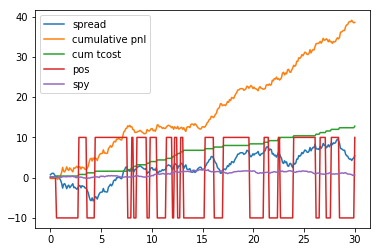

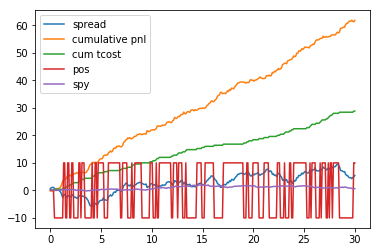

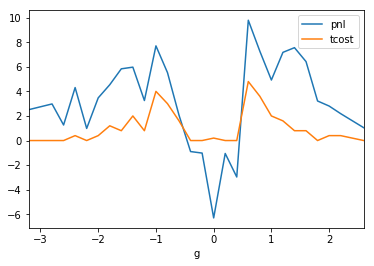

In [289]:
#using functools.reduce to generate momshortcap
#includes a hysteresis function that prevents churn
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

T=30.0
N=300
t=np.linspace(0,T,N)

#random brownian motion building blocks
mu=0.2
sigma=1.0
S0=20.0
dt=T/N

#random noise for spread moves
W=np.random.standard_normal(size=N)
#random moves for spy
Z=np.random.standard_normal(size=N)

#next 3 lines are irrelevant for spread modeling as returns are not the same as percentage returns
'''
W=np.cumsum(W)*np.sqrt(dt)
X=(mu-0.5*sigma**2)*t + sigma*W
S=S0*np.exp(X)
'''
#spread changes are random brownian motion
#y=W

#spread changes are a sinusoid smooth function
#y=np.sin(t)

#spread changes are a combination of smooth sinusoid functions
#y=np.sin(t)+np.cos(2*t)

#spread changes are a combination of smooth functions and step function
'''
y=t**2/10-2*t+np.sin(t)+np.cos(2*t)+np.mod(t,2)+np.mod(t**2/30,4)
'''

#combination of smooth, step functions with random brownian noise
y=-t**3/1000+t**2/10-2*t+np.sin(t)+np.cos(2*t)+0.1*np.mod(t,2)+0.1*np.mod(t**2/30,4) +0.1* W


y= np.sin(t)+np.cos(2*t)+0.5*np.cumsum(W)

#y=y+0.01*Z
#y=0.1*np.mod(t,2)
#y=W

d=np.diff(y)
#g=np.gradient(y)
d=np.append(0,d)
g=d

def last(x):
	try:
		result = x[-1]
	except:
		result = x
	return result 
	
#hysteresis function acting on tuples of g,pos
def hyst(x,y):
	th=0.0
	db=1.0
	if last(last(x))==0:
		if y[0]>th+db:
			y[1]=1
		elif y[0]<-1*(th+db):
			y[1]=-1
		else:
			y[1]=0
		return np.vstack([x,y])
	if last(last(x))==1:
		if y[0]>th-db:
			y[1]=1
		elif y[0]<-1*(th+db):
			y[1]=-1
		else:
			y[1]=0
		return np.vstack([x,y])
	if last(last(x))==-1:
		if y[0]<-1*th+db:
			y[1]=-1
		elif y[0]>th+db:
			y[1]=1
		else:
			y[1]=0
		return np.vstack([x,y])

    
#equivalent of shortmomcap calcs, improves sharpe by a factor of 2
g90=reduce(lambda x,y:np.append(x,0.9*last(x)+y),g)
g50=reduce(lambda x,y:np.append(x,0.5*last(x)+y),g)	
g20=reduce(lambda x,y:np.append(x,0.2*last(x)+y),g)	
gg20=reduce(lambda x,y:np.append(x,0.2*last(x)+y),g20)	

#g=g20+.2*g50+.1*g90
g=[x+y if x*y>0.0 else 0 for x,y in zip(g50,g20)]
#g=g20

gprev=np.roll(g,1)
gprev2=np.roll(gprev,1)

#-------------------------------------------------
#position with hysteresis to avoid churn
#-------------------------------------------------

pos=np.zeros(len(g))
gposzip=zip(g,pos)
gposarr=[[x,y] for x,y in gposzip]



pos=np.array([y for x,y in reduce(hyst,gposarr)])
#pos=np.array([y for x,y in reduce(hyst_from_dict,g_stepwiseposarr)])


#uncomment next line to get 'dumb' positioning that suffers from extreme churn
#pos=np.sign(gprev)

#pos=gprev
posprev=np.roll(pos,1)

pnl=d*pos

tcost=abs(pos-posprev)*0.2
cpnl=np.cumsum(pnl-tcost)
ctcost=np.cumsum(tcost)

#plot time series
fig0,s0=plt.subplots(1,1)
s0.plot(t,y,label='spread')
s0.plot(t,cpnl,label='cumulative pnl')
s0.plot(t,ctcost, label='cum tcost')
s0.plot(t,pos*10,label='pos')
s0.plot(t,0.1*np.cumsum(Z),label='spy')
s0.legend(loc='upper left')
fig0.show()

#sharpe
print("sharpe = {0:.2f}".format(np.average(pnl-tcost)/np.std(pnl-tcost)))


#-------------------------------------------
#define dictionary for stepwise hysteresis function
#--------------------------------------------
import itertools
g_stepwise = np.array([np.round((x-x%0.2),2) for x in g])
#g_stepwise = np.array([np.round(x,2) for x in g])

pos=np.zeros(len(g_stepwise))
gposzip=zip(g_stepwise,pos)



#g_stepwise_list = [-4,-3,-2,-1,0,1,2,3,4]
g_stepwise_list = np.unique(g_stepwise)
prevposlist = [-1,0,1]
g_stepwise_poslist = list(itertools.product(g_stepwise_list,prevposlist))

def position_map(g,prevpos):
    db=0.5
    if prevpos==0:
        if g<-db:
            return -1
        elif g>db:
            return 1
        else:
            return 0

    if prevpos==1:
        if g<-db:
            return -1
        else:
            return 1

    if prevpos==-1:
        if g>db:
            return 1
        else:
            return -1



gpos_lookup_dict=dict(zip(g_stepwise_poslist,[position_map(x,y) for x,y in g_stepwise_poslist]))
gpos_lookup_dict
#gpos_lookup_dict[(1,0)]

#hysteresis function based on a dict lookup acting on tuples of g,pos
def hyst_from_dict(x,y):

    prevpos=last(last(x))
    g_stepwise_latest=y[0]
    y[1]=gpos_lookup_dict[(g_stepwise_latest,prevpos)]
    return np.vstack([x,y])
gpos_lookup_dict

#-------------------------------------------------
#position with stepwise hysteresis to avoid churn
#-------------------------------------------------

pos=np.zeros(len(g))
#g_stepwise = np.array([np.round((x-x%0.1),2) for x in g])
#g_stepwise = np.array([np.round(x,2) for x in g])

g_stepwiseposzip = zip(g_stepwise,pos)
g_stepwiseposarr = [[x,y] for x,y in g_stepwiseposzip]


pos=np.array([y for x,y in reduce(hyst_from_dict,g_stepwiseposarr)])
#stupid churn strategy
#pos=np.sign(gprev)


posprev=np.roll(pos,1)

pnl=d*pos

tcost=abs(pos-posprev)*0.2
cpnl=np.cumsum(pnl-tcost)
ctcost=np.cumsum(tcost)

#plot time series
fig1,s1=plt.subplots(1,1)
s1.plot(t,y,label='spread')
s1.plot(t,cpnl,label='cumulative pnl')
s1.plot(t,ctcost, label='cum tcost')
s1.plot(t,pos*10,label='pos')
s1.plot(t,0.1*np.cumsum(Z),label='spy')
s1.legend(loc='upper left')
fig1.show()

#sharpe
print("sharpe = {0:.2f}".format(np.average(pnl-tcost)/np.std(pnl-tcost)))

#plot histogram of pnl
'''
fig2,s2=plt.subplots(1,1)
histy,histx=np.histogram(pnl, bins = np.arange(min(pnl),max(pnl),(max(pnl)-min(pnl))/30))

s2.plot(histx[0:-1],histy, label='pnl')
fig2.show()
'''

import pandas as pd
pnldf = pd.DataFrame(list(zip([x-x%0.2 for x in g], pnl,tcost)),columns=['g','pnl','tcost'])

pnldf.groupby('g')[['pnl','tcost']].sum(axis=0).plot()

In [315]:
#gridsearch across th,db for hyst

    
def tweakSharpe(th,db,c=0.5):
    
    def hyst(x,y,th=th,db=db):
        #th=0.0
        #db=1.0
        if last(last(x))==0:
            if y[0]>th+db:
                y[1]=1
            elif y[0]<-1*(th+db):
                y[1]=-1
            else:
                y[1]=0
            return np.vstack([x,y])
        if last(last(x))==1:
            if y[0]>th-db:
                y[1]=1
            elif y[0]<-1*(th+db):
                y[1]=-1
            else:
                y[1]=0
            return np.vstack([x,y])
        if last(last(x))==-1:
            if y[0]<-1*th+db:
                y[1]=-1
            elif y[0]>th+db:
                y[1]=1
            else:
                y[1]=0
            return np.vstack([x,y])
    
    d=np.diff(y)
    #g=np.gradient(y)
    d=np.append(0,d)
    g=d



    #equivalent of shortmomcap calcs, improves sharpe by a factor of 2
    g90=reduce(lambda x,y:np.append(x,0.9*last(x)+y),g)
    g50=reduce(lambda x,y:np.append(x,0.5*last(x)+y),g)	
    g20=reduce(lambda x,y:np.append(x,0.2*last(x)+y),g)	
    gg20=reduce(lambda x,y:np.append(x,0.2*last(x)+y),g20)	

    #g=g20+.2*g50+.1*g90
    g=[x+y if x*y>0.0 else 0 for x,y in zip(g50,g20)]
    #g=g20

    gprev=np.roll(g,1)
    gprev2=np.roll(gprev,1)

    #-------------------------------------------------
    #position with hysteresis to avoid churn
    #-------------------------------------------------

    pos=np.zeros(len(g))
    gposzip=zip(g,pos)
    gposarr=[[x,y] for x,y in gposzip]



    pos=np.array([y for x,y in reduce(hyst,gposarr)])
    #pos=np.array([y for x,y in reduce(hyst_from_dict,g_stepwiseposarr)])


    #uncomment next line to get 'dumb' positioning that suffers from extreme churn
    #pos=np.sign(gprev)

    #pos=gprev
    posprev=np.roll(pos,1)

    pnl=d*pos

    tcost=abs(pos-posprev)*c
    cpnl=np.cumsum(pnl-tcost)
    ctcost=np.cumsum(tcost)

    # #plot time series
    # fig0,s0=plt.subplots(1,1)
    # s0.plot(t,y,label='spread')
    # s0.plot(t,cpnl,label='cumulative pnl')
    # s0.plot(t,ctcost, label='cum tcost')
    # s0.plot(t,pos*10,label='pos')
    # s0.plot(t,0.1*np.cumsum(Z),label='spy')
    # s0.legend(loc='upper left')
    # fig0.show()

    #sharpe
    #print("sharpe = {0:.2f}".format(np.average(pnl-tcost)/np.std(pnl-tcost)))
    return (np.average(pnl-tcost)/np.std(pnl-tcost))

tweakSharpe(0,1)

from my.custom import gridsearch

#find optimal th, db
def tweakTweakSharpe(c):
    result = gridsearch(tweakSharpe,np.linspace(-2,2,21),np.linspace(-2,2,21),[c])
    return result.sort_values(by='y0', ascending=False).iloc[0]

result = pd.DataFrame({})
for x in np.linspace(0,1,11):
    result = result.append(tweakTweakSharpe(x))
result

C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid valu

,x0,x1,x2,y0
"(-2.0, -2.0, 0.0)",-2.0,-2.0,0.0,1.263021
"(-2.0, -2.0, 0.1)",-2.0,-2.0,0.1,0.993313
"(0.0, 0.0, 0.2)",0.0,0.0,0.2,0.699496
"(-0.3999999999999999, -0.19999999999999996, 0.30000000000000004)",-0.4,-0.2,0.3,0.496580
"(0.20000000000000018, 0.40000000000000036, 0.4)",0.2,0.4,0.4,0.312210
"(0.6000000000000001, 0.8000000000000003, 0.5)",0.6,0.8,0.5,0.197909
"(0.8000000000000003, 1.4000000000000004, 0.6000000000000001)",0.8,1.4,0.6,0.163392
"(0.8000000000000003, 1.4000000000000004, 0.7000000000000001)",0.8,1.4,0.7,0.133836
"(0.8000000000000003, 1.4000000000000004, 0.8)",0.8,1.4,0.8,0.103983
"(0.40000000000000036, 1.8000000000000003, 0.9)",0.4,1.8,0.9,0.083894


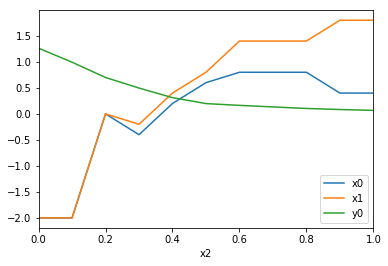

In [318]:
#higher the transaction cost, higher the threshold and deadband (th,db) have to be for optimal sharpe
result.plot(x='x2',y=['x0','x1','y0'])

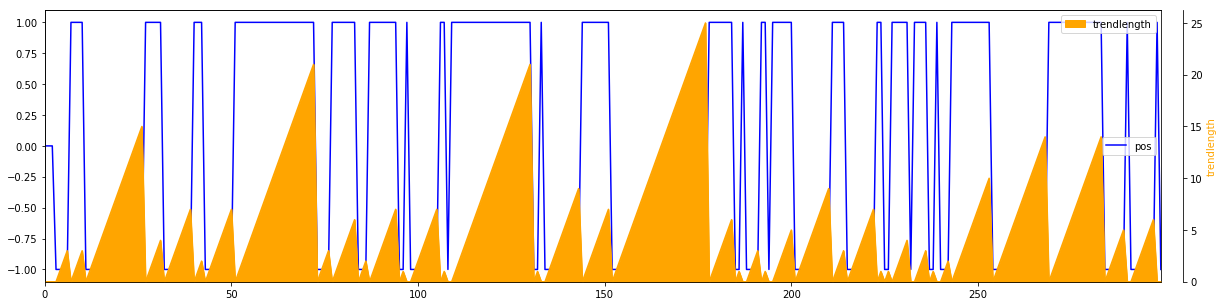

In [280]:
#calculate length of a trend - trending higher or lower for consecutive periods

def last(x):
	try:
		result = x[-1]
	except:
		result = x
	return result 

def first(x):
    try:
        result = x[0]
    except:
        result = x
    return result
    

def trendlength(x,y):

    if first(y)*first(last(x))>0:
        y[1]=last(last(x))+1
    else:
        y[1]=0
    return np.vstack([x,y])

#x=[1,1,1,2,3,4,4,5,2,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2,2,2,-2,-2,-2,-2]
x=pos
y=np.zeros(len(x))
xy=[[x,y] for x,y in zip(x,y)]

from functools import reduce

z = [y for x,y in reduce(trendlength,xy)]
df=pd.DataFrame({'pos':x,'trendlength':z})

ax1=df.plot(y='pos',color='b')

ax2=ax1.twinx()
ax2.set_ylabel('trendlength', color='orange')
ax2.tick_params('trendlength', colors='orange')
ax2.spines['right'].set_position(('axes', 1.02))
df.plot(ax=ax2,y='trendlength',color='orange',kind='area',figsize=(20,5))

#trend length increases while position remains on the same side


In [ ]:
import timeit
%timeit pos=np.array([y for x,y in reduce(hyst,gposarr)])
%timeit pos=np.array([y for x,y in reduce(hyst_from_dict,g_stepwiseposarr)])


In [ ]:
import itertools
g_stepwise = np.array([np.round((x-x%0.25),2) for x in g])

pos=np.zeros(len(g_stepwise))
gposzip=zip(g_stepwise,pos)



#g_stepwise_list = [-4,-3,-2,-1,0,1,2,3,4]
g_stepwise_list = np.unique(g_stepwise)
prevposlist = [-1,0,1]
g_stepwise_poslist = list(itertools.product(g_stepwise_list,prevposlist))

def position_map(g,prevpos):
    if prevpos==0:
        if g<-1:
            return -1
        elif g>1:
            return 1
        else:
            return 0

    if prevpos==1:
        if g<-1:
            return -1
        else:
            return 1

    if prevpos==-1:
        if g>1:
            return 1
        else:
            return -1



gpos_lookup_dict=dict(zip(g_stepwise_poslist,[position_map(x,y) for x,y in g_stepwise_poslist]))
gpos_lookup_dict
gpos_lookup_dict[(1,0)]

#hysteresis function based on a dict lookup acting on tuples of g,pos
def hyst_from_dict(x,y):

    prevpos=last(last(x))
    g_stepwise_latest=y[0]
    y[1]=gpos_lookup_dict[(g_stepwise_latest,prevpos)]
    return np.vstack([x,y])
gpos_lookup_dict

In [ ]:

#regression on time series using statsmodels
import statsmodels.api as sm
ones = np.ones(len(t))
#model = sm.OLS(dhyg,np.column_stack((np.roll(yhyg-yhygiv,1), np.roll(ghygiv_hifr,1),ones)))
model = sm.OLS(y,np.column_stack((gprev,ones)))

#model = sm.OLS(dhyg,ghygiv)
results = model.fit()
print(results.params)
print(results.summary())


In [ ]:
y_categorical=0.5*(1+np.array([1.0 if y_>1 else 0 for y_ in y ])+np.array([-1.0 if y_<-1 else 0 for y_ in y ]))
#y_categorical
sns.pairplot(pd.DataFrame(data=np.vstack([y_categorical,gprev])).T)


In [ ]:
#https://github.com/dilshod/xlsx2csv
#convert .xlsx files to .csv files
'''
!pip install xlsx2csv
import xlsx2csv
xlsx2csv.Xlsx2csv('G:\Cantor\DCM\Algo\IpreoHoldings.xlsx').convert('G:\Cantor\DCM\Algo\Ipreo.csv')
'''


In [ ]:
import numpy as np 
#@np.vectorize
def LehmerMean(p,x):
    xwt = np.abs(x)**p
    return sum (x*xwt) / float(sum(xwt))
print(LehmerMean(10,[-11.1,2.3,3.2]))
x = np.array([-1.1,2.3,-3.9,4.5])
print(LehmerMean(10,x[x<0]))



In [ ]:
def inverse_sigmoid(x):
    return -np.log(.5/x - 1)

plt.plot([inverse_sigmoid(x) for x in np.linspace(-10, 10, 1000)])
plt.show()

In [ ]:
from datetime import datetime, date, time, timedelta
!pip install businesstime
import businesstime

HOLIDAYS = [date(2017, 5, 29), date(2017, 12, 25)]
bt = businesstime.BusinessTime(business_hours=[time(8), time(18)], holidays=HOLIDAYS)


examples = [(datetime(2017, 5, 22, 16), datetime(2017, 5, 22, 17), timedelta(0, 3600)),
            (datetime(2017, 5, 22, 16), datetime(2017, 5, 22, 18), timedelta(0, 7200)),
            (datetime(2017, 5, 22, 16), datetime(2017, 5, 22, 19), timedelta(0, 7200)),
            (datetime(2017, 5, 19, 18), datetime(2017, 5, 22,  6), timedelta(0, 0)),
            (datetime(2017, 5, 19, 16), datetime(2017, 5, 22, 8), timedelta(0, 10800)),
            (datetime(2017, 5, 22, 16), datetime(2017, 5, 23, 7), timedelta(0, 7200)),
            (datetime(2017, 5, 26, 16), datetime(2017, 5, 29, 8), timedelta(0, 7200)),
            (datetime(2017, 5, 26, 16), datetime(2017, 5, 30, 8), timedelta(0, 10800)),
            (datetime(2017, 12, 22, 16), datetime(2017, 12, 25, 8), timedelta(0, 7200)),
            (datetime(2017, 12, 22, 16), datetime(2017, 12, 26, 8), timedelta(0, 10800))]


for start, end, delta in examples:
    #assert( bt.businesstimedelta(start, end) == delta)
    print( bt.businesstimedelta(start, end).seconds == delta.seconds)

    

In [ ]:
def smart_collars(signal, target_by_signal, collar_size, ramp):
    '''
    given an alpha signal,  computes min collar, target  and max collar
    so that the stronger the signal, the less it allows positions against the signal to be put on
    uses a logit function to scale the collars closer or away from the target 
    
    target_by_signal is a positive value, usually driven by expected flow or trading volume
    
    collar_size is the difference between max and min collars, and will always be constant for any signal value
    
    ramp is how quickly the adverse collar snaps to the target
    value of 0 will keep collars symmetric for all signal values
    value of 4-10 is probably reasonable
    value of 100 makes the snapping practically immediate
    
    '''
    target = -1.0 * signal * target_by_signal
    signal_fn_min = collar_size * (1.0 / (1.0+np.exp(ramp * signal)))
    signal_fn_max = collar_size * (1.0 / (1.0+np.exp(-1.0*ramp * signal)))
    min_collar = (-1*collar_size) + target + signal_fn_min
    max_collar = collar_size + target - signal_fn_max
    result = pd.Series([min_collar, target, max_collar], index=['_min_collar', '_target', '_max_collar'])
    
    return result

df = pd.DataFrame({'signal':np.arange(-2.0,2.0,.01)})
df[['min_collar','target','max_collar']] = df.apply(lambda x: smart_collars(x['signal'],2000.0,2000.0,2.0), axis = 1)
df.plot(x = 'signal', y = ['min_collar','target','max_collar'])
plt.show()


In [ ]:
def PNL(duration,p1,bid1,ask1,tradedelta,tradelevel,bid2,ask2):
    '''
    p1 = starting position, $000s, marked at bid1/ask1
    tradedelta = signed trade quantity, $000s, traded at level = tradedelta
    bid2/ask2 = final mark for resulting position p2 = p1+tradedelta    
    '''
    p2 = p1 + tradedelta

    mark2 = bid2 if p2>0 else ask2
    final = p2*mark2
    
    mark1 = bid1 if p1>0 else ask1
    initial = p1*mark1
    
    trade = tradedelta*tradelevel
    
    #straightforward final minus initial calculation for totalPNL
    totalPNL = -0.1*duration *(final - initial - trade)
    #positionPNL is the same as totalPNL when no trades occur        
    positionPNL = -0.1*duration *p1*(bid2-bid1 if p1>0 else ask2-ask1)
    tradePNL = totalPNL - positionPNL   

    return pd.Series([totalPNL, positionPNL, tradePNL], index=['_totalPNL', '_positionPNL', '_tradePNL'])

PNL(24.82545342,-680,322,293.7739267,0,0,305,293.7156064)

In [ ]:
#visualizing ewm decay rates
from scipy import stats


#Specify time intervals
T=30.0 #days
N=300
t=np.linspace(0,T,N) #1-hour intervals, assuming 10-hour days
dt= T/N #time-steps

#random brownian motion building blocks
mu=0.2
sigma=1.0
S0=20.0
dt=T/N
W=np.random.standard_normal(size=N)

#Average market spreads follow smooth periodic function
s_mkt=y0=20*( 5+ 2*np.sin(0.4*t)+2*np.cos(0.5*t) )
#Sector1 spreads = average market spread + sinusoid smooth function + random brownian noise
s_sec1=y1=s_mkt+10*(np.sin(t) + 0.05*np.random.standard_normal(size=N))
#Sector2 spreads = average market spread + combination of smooth sinusoid functions + random brownian noise
s_sec2=y2=1.1*s_mkt+20*(0.5*np.sin(2*t)+0.5*np.cos(3*t) + 0.05*np.random.standard_normal(size=N))
#Sector3 spreads = average market spread + combination of smooth sinusoid functions + random brownian noise
s_sec3=y3=1.2*s_mkt + 30*(0.5*np.sin(t)+0.5*np.cos(2*t) + 0.05*np.random.standard_normal(size=N))
#Sector3 spreads = average market spread + combination of smooth sinusoid functions + random brownian noise
s_sec4=y4=1.2*s_mkt + 30*(0.6*np.sin(0.8*t)+0.6*np.cos(1.3*t) + 0.05*np.random.standard_normal(size=N))

df = pd.DataFrame({'s_sec2':s_sec2,'s_sec3':s_sec3})
df['s_sec3_ewma'] = df['s_sec3'].ewm(alpha = 0.9).mean()
#Sector4 spreads are a combination of smooth, step functions with random brownian noise
#Jumpy functions do not work well with momentum signals - as expected
#s_sec4=y4=1.3*s_mkt+5*(-t**3/1000+t**2/10-2*t+np.sin(t)+np.cos(2*t)+np.mod(t,2)+np.mod(t**2/30,4) + 0.01*W)

fig,s=plt.subplots(1,1)
s.plot(t,s_mkt, label='mkt')
s.plot(t,s_sec1, label='sec1')
s.plot(t,s_sec2, label='sec2')
s.plot(t,s_sec3, label='sec3')
s.plot(t,s_sec4, label='sec4')

s.legend(loc='upper left')
s.set_title('Sector Spreads')
plt.show()

df[['s_sec3','s_sec3_ewma']].plot()
plt.show()

In [ ]:
#Set_value is 3x more expensive than .loc
df = pd.DataFrame({'key1':['a','b','c'],'col1':[1.2,2.1,3.3],'col2':[2.4,2.5,6.3]})
df = df.set_index('key1')
%time df.at['a','col1']
%time df.ix['a','col1']
%time df.loc['a','col1'] = 60.
%time df.set_value('a','col1',60.)
%time df.loc['a',['col1','col2']] = [100,200]
%time df.set_value('b',['col1','col2'],[100,201])
%time df.at['a','col1']=1000

In [ ]:
#get object by its id
import gc

def objects_by_id(id_):
    for obj in gc.get_objects():
        if id(obj) == id_:
            return obj
    raise Exception("No found")

d = [1,2,3]
objects_by_id(id(d))

In [ ]:
#rotate a list - why do numpy/pandas not have this as an inbuilt method?
def rotate(l, n):
    return l[-n:] + l[:-n]
rotate(['a','b','c','d'],1)

#lambda implementation
(lambda x,y:x[-y:] + x[:-y])(['a','b','c','d'],1)
globals()['rotate']

In [ ]:
#calculate gspread by linearly interpolating treasury curve

import numpy as np
import matplotlib.pyplot as plt

#treasury curve
m=np.array([2,3,5,7.002,10,30,100])
y=np.array([2., 2.5, 2.75, 2.9,3.1, 3.4,3.4])

#corp maturity and yield
cm=30
cy=3.78

if any(cm==m):
    cm+=0.001
    
md=m-cm
absmd=abs(md)
#lower end of maturity bucket
mdlower=md*np.append(md[1:],0)
mdlbin=[x<0 for x in mdlower]

#higher end of maturity bucket
mdhigher=md*np.append(0,md[:-1])
mdhbin=[x<0 for x in mdhigher]

mbin=[x or y for x,y in zip(mdlbin,mdhbin)]

segment_distance=absmd[mbin]
segment_yield=y[mbin]
gy = np.sum([np.prod([segment_distance[::-1],segment_yield],axis=0)])/np.sum(segment_distance)
gspread = cy - gy
print(gspread)

fig0,s0=plt.subplots(1,1)
s0.plot(m,y,label='tcurve')
s0.plot(cm,cy,label='cyield', marker='o')
s0.plot(cm,gy,label='gyield', marker='o')
s0.legend(loc='lower right')
plt.show()

#write it as a callable function
def gyield(m,y,cm,cy):
    if any(cm==m):
        cm+=0.001
    md=m-cm
    absmd=abs(md)
    #lower end of maturity bucket
    mdlower=md*np.append(md[1:],0)
    mdlbin=[x<0 for x in mdlower]

    #higher end of maturity bucket
    mdhigher=md*np.append(0,md[:-1])
    mdhbin=[x<0 for x in mdhigher]

    mbin=[x or y for x,y in zip(mdlbin,mdhbin)]

    segment_distance=absmd[mbin]
    segment_yield=y[mbin]
    gy = np.sum([np.prod([segment_distance[::-1],segment_yield],axis=0)])/np.sum(segment_distance)
    gspread = cy - gy
    return gspread

print(gyield(m,y,cm,cy))


In [ ]:
#Pandas does not merge, concatenate or join very efficiently or in a straightforward manner
#There should be a simple, efficient way to join a second dataframe to the first if keys match
#Values from the second dataframe will be copied over to the first for matching columns and keys
#And additional columns created if they do not match. NaN's created during this process can be optionally filled
#Keys in the second dataframe not contained in the first will be dropped or ignored
df1=pd.DataFrame({'key1':['a','b','c','d'],'val0':[6,7,8,9],'val1':[1,2,3,4]}).set_index('key1')
df2=pd.DataFrame({'key1':['b','c','d','e'],'val1':[20,30,40,50],'val2':[200,300,400,500]}).set_index('key1')

def keyed_left_join(df1_input,df2_input,**kwargs):
    df1= df1_input.copy()
    df2= df2_input.copy()
    r1 = df1.index.tolist()
    r2 = df2.index.tolist()
    r1and2 = [val for val in r1 if val in r2]
    c1 = df1.columns.tolist()
    c2 = df2.columns.tolist()
    c1and2 = [val for val in c1 if val in c2]
    df1.loc[r1and2,c1and2] = df2.loc[r1and2,c1and2]
    
    c2not1 = [val for val in c2 if not val in c1]
    df1[c2not1] = df2[c2not1]
    
    if not kwargs == {}:
        if not kwargs['fillna'] == None:
            df1[c2not1] = df1[c2not1].fillna(kwargs['fillna']) 
    
    return df1


print(keyed_left_join(df1,df2))
print(keyed_left_join(df1,df2,fillna=0.0))

#Trying pandas inbuilt methods - all of them suck!
#combine_first replaces existing rows correctly, but adds rows that are present in df2 but not in df1.. 
#can be fixed by reindexing
print(df2.combine_first(df1).reindex(df1.index).fillna(-9999))
#Look at this - we lose all keys!
print(pd.merge(df1,df2))
#This would be an intuitive way using left_on and right_on - pandas shits all over the place!
#print(pd.merge(df1,df2,left_on='key1', right_on='key1'))

#Let's try concat - pandas assumes i am dumb: val1_x and val1_y, reall_y?
print(pd.concat([df1,df2],axis=1))

#Back to merge, specify more and more parameters - oh Pandas, pardon us inferior human beings! We sin by mixing up x and y!!
#print(pd.merge(df1,df2,how='left',left_index='key1', right_index='key1'))
#print(pd.merge(df1,df2,how='left',left_index='key1', right_index='key1',suffixes=('_x','_y')))
#I am not dumb, i want to copy over values in df2 over to df1 where columns and keys match
#Complete shit show here... oh boy
#print(pd.merge(df1,df2,how='left',left_index='key1', right_index='key1',suffixes=(None,None)))
#print(pd.merge(df1,df2,how='left',left_index='key1', right_index='key1',suffixes=('','')))

#Can be achieved with the following concatenate function...
print(pd.concat([df1,df2],axis=1))

#columns can be renamed to distinguish the origin
df3 = df1.rename(columns = {'val1':'val1_from_df1'})
df4 = df2.rename(columns = {'val1':'val1_from_df2'})

print(pd.concat([df3,df4],axis=1))


In [ ]:
#resample, asof join in pandas
start = pd.Timestamp('2018-04-01 9:30:00')
end = pd.Timestamp('2018-04-10 15:45:00')
t = np.linspace(start.value, end.value, 100)
t = pd.to_datetime(t)
df = pd.DataFrame({'time':t,'level':0})
df = df.set_index('time')
df=df.resample('5min').ffill().between_time('9:30am', '4:00pm')
df


In [ ]:
#get source code of any function
import inspect
def trial_func(x):
    return x
print(inspect.getsourcelines(trial_func))
#inspect.getsourcelines(inspect)

In [713]:
#Class declaration and population
members = {'dummy':('entry','trial')}

class Member:
    def __init__(self, name, email, number):
        self.name = name
        self.email = email
        self.number = number
    def addmember(name, email, number):
        members[name] = email, number
        print('Member {0} has been added to addressbook'.format(name))
    def deletemember(name):
        del members[name]
        print('Member {0} has been deleted from addresbook'.format(name))
    def changemember(name, email, number):
        del members[name]
        members[name] = email, number
        print('Members contact information is changed')
    def Check():
        print("You've got {0} members in your addressbook".format(len(members)))
        print(members.items())
        print(members.keys())
        for name,(email,number) in members.items(): #the problem is here
            print('Contact {0} has email:{1} and has number:{2}'.format(name,email,number))
            

Member.addmember('Tim', 'email@mail.com', '43454')
Member.Check()

Member Tim has been added to addressbook
You've got 2 members in your addressbook
dict_items([('dummy', ('entry', 'trial')), ('Tim', ('email@mail.com', '43454'))])
dict_keys(['dummy', 'Tim'])
Contact dummy has email:entry and has number:trial
Contact Tim has email:email@mail.com and has number:43454


In [54]:
#has to run on local machine to establish connection to localhost
#!pip install qpython
#enabling two-way communication between kdb and python
#http://stackoverflow.com/questions/29526017/passing-pandas-dataframe-containing-string-column-to-kdb-using-qpython-api
#more documentation about data types and mapping at https://media.readthedocs.org/pdf/qpython/qpython-1.1-dev/qpython.pdf
import numpy as np
import pandas as pd
from qpython.qconnection import QConnection
from qpython.qconnection import QWriter
from qpython import MetaData 
from qpython.qtype import QSYMBOL_LIST, QSTRING_LIST, QINT_LIST, QDATETIME_LIST, QTIMESTAMP_LIST,QDOUBLE_LIST,QFLOAT_LIST
from qpython.qcollection import QList

'''
with QConnection(host='exdpcny088', port=3456, writer_class=QWriter) as q:
          q.sync('.u.upd', np.str_('testTbl'), [qtype.qnull(qtype.QSYMBOL), "null everything except this column", np.nan])
'''

try:
    q = QConnection(host='localhost', port=3456, pandas=True)
    q.open()
except:
    q = QConnection(host='localhost', port=3456, pandas=True)
    q.open()

q('mystring:"trial string"')#simple query
q('{a::x}',np.string_('ablc')) #assigning a symbol
q('{a::x}',('ablc')) #assigning a string

q('kdbtable:([]col1:`a`b`c;col2:3.5,4,5;col3:5.0,4.3,5.6)') #define a table, same as running a query
q('{insert[`kdbtable][x]}',[np.string_('foo'),np.float32(42),np.float64(43.0)]) #inserting a new row in a table
q('{insert[`kdbtable][x]}',[np.string_('foo'),np.int64(43),np.float64(47.0)]) #inserting a new row in a table
q('{newvar::x}',np.datetime64('2000-01-04T05:36:57.600','ns')) #assign timestamp
q('{newvar::x}',np.datetime64('2000-01-04T05:36:57.600','ms')) #assign datetime, deprecated, so be careful in using

f=pd.DataFrame({'datetime':pd.date_range('1/1/2011', periods=12, freq='H'),
                 'cusip':2*['a','b','a','c','b','a'], 
                 'weight':2*[2.3,3.6,1.2,4.5,9.2,7.3],
                 'gspread':2*[3.4,4.5,2.3,5.4,8.1,9.2]})

f.meta = MetaData(cusip = QSYMBOL_LIST, datetime = QDATETIME_LIST, gspread = QDOUBLE_LIST)

q('set', np.string_('tbl'), f) #assign dataframe to a table
q('insert',np.string_('tbl'),f) #append dataframe to a table
q('{insert[`tbl][x]}',[np.datetime64('2000-01-04T05:36:57.600','ms'),
                       np.string_('d'),
                       np.float64(52.0),np.float64(56.0)]) #inserting a new row in a table with timestamps

q('tbl_pivot:exec (exec distinct cusip from tbl)#(cusip!weight) by datetime:datetime from tbl')

q.close()

In [ ]:
#Create an array of dataframes
#http://stackoverflow.com/questions/33907776/how-to-create-an-array-of-dataframes-in-python
import datetime as dt 
import numpy as np
import pandas as pd

dates_list = [dt.datetime(2015,11,i+1) for i in range(3)]
month_day_list = [d.strftime("%m%d") for d in dates_list]

dataframe_collection = {} 

for month_day in month_day_list:
    new_data = np.random.rand(3,3)
    dataframe_collection[month_day] = pd.DataFrame(new_data, columns=["one", "two", "three"])

for key in dataframe_collection.keys():
    print("\n" +"="*40)
    print(key)
    print("-"*40)
    print(dataframe_collection[key])

In [ ]:
#backtest framework based on functions and argument matching
df_master = pd.DataFrame(data=np.random.randn(10,3),columns=['a','b','c'])

def compute_mid(df_master,alphadecay):
    return df_master[['a','b']].mean(axis=1)

def fit_func_two_sided(x):
    return (x['a']>x['b']) & (x['b']>x['c'])

def fit_func_one_sided(x):
    return (x['a']>x['b'])

def compute_fit(df_master,fit_func):
    return df_master.apply(fit_func,axis=1)

    
df_master['mid'] = compute_mid(df_master=df_master,alphadecay=0.9)
df_master['fit_two_sided'] = compute_fit(df_master=df_master,fit_func=fit_func_two_sided)
df_master['fit_one_sided'] = compute_fit(df_master=df_master,fit_func=fit_func_one_sided)


#print(id(df_master))
print(df_master)

In [ ]:
#using *args and **kwargs (or *vars and **vars)
def f(*vars):
    for item in vars:
        print(item)
#f(2,3,4)

def f(**vars):
    for key,value in vars.items():
        print(key,value)
#f(x=2,y=3,z=4)

#when *args is not supplied, arg is an empty tuple, not an empty list
def f(x,y,*args):
    print(type(args))
    print(args == ())
    pass

f(1,2)

#a function can be made flexible so that an undefined input leads to an error trapping route rather than throw an exception
def f(x,y,arg=1):
    if arg==1:
        return('default input for third parameter')
    else:
        return('user entered input for third parameter')

print(f(1,2))
print(f(1,2,'undefined'))
#however, note that specifying an undefined variable as an input still results in an error
#this can only be handled outside of the function using a try-except statement
#print(f(1,2,undefined))



#when *kwargs is not supplied, arg is an empty dictionary
def g(x,y,**kwargs):
    print(type(kwargs))
    print(kwargs == {})
    pass

#print(g(1,2))

In [ ]:
#assigning multiple columns
df = pd.DataFrame(data=np.random.randn(100, 3), columns=['a', 'b', 'c'])
def test_function(srs):
    return pd.Series([srs['a'] + srs['b'], srs['b'] + srs['c']], index=['test', 'test2'])

df[['test1', 'test2']] = df.apply(test_function, axis=1)
df


In [ ]:
#Expand window to fit multiple screens
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
#projecting a function using functools.partial
from functools import partial
def function_to_project(x,y):
    return x+y*2

projected_function = partial(function_to_project,x=3)

print(projected_function(y=10))

 
#when function to be projected is too complicated for partials, can use globals
def function_to_project_without_partial(y):
    global x
    return x+y*2
x=3
print(function_to_project_without_partial(10))

In [ ]:
#argument matching
def function_trial(x,y):
    i=0
    while i < 1e7:
        i+=1
    return i+x+y

%time function_trial(x=2,y=3)
#function_trial(2,y=3)
#function_trial(y=2,x=4)

In [ ]:
import profile
#help(profile.run)
profile.run('function_trial(x=2,y=3)')

In [ ]:
#run line-by-line diagnostics for any function's performance
#doesnt seem to work with python 3
try:
    
    !pip install line_profiler
    %load_ext line_profiler
    %lprun -f function_trial function_trial(2,3)
except:
    print('fuckit')

In [ ]:
#basics of Classes as objects

import math

class Circle(object):
    'Documentation at https://www.youtube.com/watch?v=HTLu2DFOdTg '

    version = '1.0'
    
    def __init__(self,radius):
        self.radius = radius
    
    def area(self):
        'Square radius and multiply by pi'
        return math.pi*self.radius**2.0
    
    def perimeter(self):
        return 2*math.pi*self.radius
    
    
    
print('Version = ' + Circle.version)
c = Circle(10)
print('A circle of radius' , c.radius)
print('has an area of', c.area())

dict.fromkeys(['a','b'])

In [ ]:
import random
import itertools

def generate_syms(letters,n):
    result=[]
    for row in list(itertools.permutations(letters,n)):
        result.append(''.join(cell for cell in row))
    return result

#generate unique syms
syms = generate_syms('abcde',3)
#syms
#generate unique sectors
sectors = generate_syms('xyzpq',3)
#sectors

In [ ]:
#Create a dataframe by adding elements one at a time, and renaming the columns
#import pandas as pd
#import numpy as np

df=pd.DataFrame([])
for i in range(20):
    for j in range(3):
        df.loc[i,j] = i+j

df.columns=['test','pv_test1','pv_test2']
print(df)        


In [119]:
#create lists and dictionaries within a pandas dataframe
df = pd.DataFrame(columns=['test','pv_test1','pv_test2'])
for i in range(20):
    df.loc[i,'test'] = np.arange(i)  
    df.loc[i,'pv_test1'] = i*10
    df.loc[i,'pv_test2'] = i*100
print(df)

#sum of arbitrary number of columns 
df['pv_test3']= df[df.columns[df.columns.str.contains('pv*')]].sum(axis=1)
df

df['pv_test4']= np.array({'a':[1],'b':[2]})
df['pv_test4'][1]= np.array({'a':[2],'b':[4]})
df['pv_test4'][1].tolist()['a']

dict(one=2, three=4)

df['pv_test4'][2]= dict(one=2, three=4)


x = dict(one=2, three=4)
x['one'] = 3
print(x)

df['pv_test4'][2]['one'] = 5
df['pv_test4'][2]['four'] = 9

#df['pv_test5'][1]= array({'a':[2],'b':[4]})
#df['pv_test5'][1].tolist()['a']
#rolling apply on one column
df['pv_test1'].rolling(5).apply(lambda y: y[0])
df

                                                 test pv_test1 pv_test2
0                                                  []        0        0
1                                                 [0]       10      100
2                                              [0, 1]       20      200
3                                           [0, 1, 2]       30      300
4                                        [0, 1, 2, 3]       40      400
5                                     [0, 1, 2, 3, 4]       50      500
6                                  [0, 1, 2, 3, 4, 5]       60      600
7                               [0, 1, 2, 3, 4, 5, 6]       70      700
8                            [0, 1, 2, 3, 4, 5, 6, 7]       80      800
9                         [0, 1, 2, 3, 4, 5, 6, 7, 8]       90      900
10                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]      100     1000
11                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]      110     1100
12             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]      120  

C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\harim\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


,test,pv_test1,pv_test2,pv_test3,pv_test4
0,[],0,0,0.0,"{'a': [1], 'b': [2]}"
1,[0],10,100,110.0,"{'a': [2], 'b': [4]}"
2,"[0, 1]",20,200,220.0,"{'one': 5, 'three': 4, 'four': 9}"
3,"[0, 1, 2]",30,300,330.0,"{'a': [1], 'b': [2]}"
4,"[0, 1, 2, 3]",40,400,440.0,"{'a': [1], 'b': [2]}"
5,"[0, 1, 2, 3, 4]",50,500,550.0,"{'a': [1], 'b': [2]}"
6,"[0, 1, 2, 3, 4, 5]",60,600,660.0,"{'a': [1], 'b': [2]}"
7,"[0, 1, 2, 3, 4, 5, 6]",70,700,770.0,"{'a': [1], 'b': [2]}"
8,"[0, 1, 2, 3, 4, 5, 6, 7]",80,800,880.0,"{'a': [1], 'b': [2]}"
9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",90,900,990.0,"{'a': [1], 'b': [2]}"


In [ ]:
#apply vs. itertuples vs. reduce - which is fastest?
df=pd.DataFrame({'datetime':pd.date_range('1/1/2011', periods=12*1000, freq='H'),
                 'cusip':2*1000*['a','b','a','c','b','a'], 
                 'weight':2*1000*[2.3,3.6,1.2,4.5,9.2,7.3],
                 'gspread':2*1000*[3.4,4.5,2.3,5.4,8.1,9.2]})

state_df_initial = pd.DataFrame({'cusip':['a','b','c'],
                         'latest_datetime':3*[pd.to_datetime('1/1/1970')],
                         'latest_weight':[0.0,0.0,0.0],
                         'latest_gspread':[0.0,0.0,0.0]}).set_index('cusip')

def ewma_martingale(alphadecay,t0,wt0,x0,t1,wt1,x1):
    '''
    updates an estimate x0 with weight wt0 that was prevailing at time t0
    given an input of x1 with weight wt1 at time t1
    exponential decay factor alphadecay is the decay per day
    '''
    age = (t1-t0).total_seconds()/86400
    decayfactor = (1-alphadecay)**age
    wt0_at_t1 = decayfactor * wt0
    t=t1
    wt=wt0_at_t1+wt1
    x=(wt0_at_t1*x0+wt1*x1)/(wt)
    result = pd.Series([t,wt,x],index=['t','wt','x'])
    return result    
                         
def itertuples_ewma_martingale(alphadecay,row,state_df):
    '''
    applies ewma_martingale to the tuple row, and updates state_df values
    '''
    result = ewma_martingale(alphadecay,
                             state_df.at[row.cusip,'latest_datetime'],
                             state_df.at[row.cusip,'latest_weight'],
                             state_df.at[row.cusip,'latest_gspread'],
                             row.datetime,
                             row.weight,
                             row.gspread)
    state_df.set_value(row.cusip,'latest_datetime',result[0])
    state_df.set_value(row.cusip,'latest_weight',result[1])
    state_df.set_value(row.cusip,'latest_gspread',result[2])

state_df = state_df_initial.copy()

def itertuplescall():
    for row in df.itertuples():
        itertuples_ewma_martingale(alphadecay=0.5,row=row,state_df=state_df)

import time
%time itertuplescall()

print(state_df)
    
    
def apply_ewma_martingale(alphadecay,row,state_df,df):
    result = ewma_martingale(alphadecay,
                             state_df.at[row['cusip'],'latest_datetime'],
                             state_df.at[row['cusip'],'latest_weight'],
                             state_df.at[row['cusip'],'latest_gspread'],
                             row['datetime'],
                             row['weight'],
                             row['gspread'])
    state_df.set_value(row.cusip,'latest_datetime',result[0])
    state_df.set_value(row.cusip,'latest_weight',result[1])
    state_df.set_value(row.cusip,'latest_gspread',result[2])


state_df = state_df_initial.copy()
%time df.apply(lambda x: apply_ewma_martingale(alphadecay=0.5,row=x,state_df=state_df, df=df),axis=1)

print(state_df)
#print(df)


In [ ]:
#import pandas as pd
df = pd.DataFrame(columns=['test','pv_test1','pv_test2'])
for i in range(20):
    df.loc[i,'test'] = np.arange(i)  
    df.loc[i,'pv_test1'] = i*10
    df.loc[i,'pv_test2'] = i*100
    
#rolling apply on two columns
global df_global
df_global= pd.DataFrame()
global var_global
var_global=[]

#print(df_global.append(df).append(pd.DataFrame({'a':[2],'b':[3]})))

def output_to_global(x):
    global var_global
    var_global=[var_global,tuple(x)]
    return 1.0
#df[['pv_test1','pv_test2']].rolling(5).apply(lambda x: x[0])

#df[['pv_test1','pv_test2']].rolling(5).apply(lambda x: tuple([type(x),type(x)]))

#df[['pv_test1','pv_test2']].rolling(2).apply(lambda x: output_to_global(x))
#var_global

df[['pv_test1','pv_test2']].rolling(5).apply(lambda x: output_to_global(x))
var_global

df[['pv_test1','pv_test2']].rolling(5).apply(lambda x: np.median(x))



In [ ]:
#itertuples
df['test1*test2']=[x.pv_test1*x.pv_test2 for x in df[['pv_test1','pv_test2']].itertuples()]
df

In [ ]:
#subplots
x = np.linspace(1,10,11)
y1 = np.random.random(11)-0.5
y2 = np.random.random(11).cumsum()

fig,ax1=plt.subplots(1,1)

ax1.plot(x,y1, 'b.', label='y1')
ax1.set_title('Title for y1')

ax2=ax1.twinx()
ax2.plot(x,y2,'g.', label='y2')

ax1.fill_between(x,0,y1)


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#alternative way to specify legend location
# ax1.legend(loc = (.75,.1), frameon = False)
# ax2.legend( loc = (.75, .05), frameon = False)

fig.suptitle('Supertitle')
plt.show() 


In [ ]:
#subplots with bar charts made from dataframes
#interspersed with print lines

for i in range(5):
    print('Iteration'+str(i))
    df_fit_good = pd.DataFrame({'metric': ['buys above mid','buys above bid','sells below mid', 'sells below ask'],
                                'values':np.random.rand(4)})

    df_fit_bad = pd.DataFrame({'metric':['buys below ask','buys below mid','sells above bid','sells above mid'],
                              'values':np.random.rand(4)})

    #df_fit_good.plot(kind='bar', x = 'metric')
    #plt.show()

    fig,[ax1,ax2]=plt.subplots(1,2)
    df_fit_good.plot(ax = ax1, kind='bar')
    ax1.set_ylim([0, 1])
    ax1.set_xticklabels(df_fit_good['metric'])

    df_fit_bad.plot(ax = ax2, kind='bar')
    ax2.set_ylim([0, 1])
    ax2.set_xticklabels(df_fit_bad['metric'])

    fig.suptitle('Supertitle')
    plt.show()     
    #fig.show() will print all lines first, and then plot the charts, go figure!
    

In [ ]:
#calculate percentile rank of last element relative to other elements
#scale negative values between -1 and 0, positive values between 0 and 1

def momentum_rank(array):
    if isinstance(array,list):
        s = pd.DataFrame({'v':array})
    elif isinstance(array,np.ndarray):
        s = pd.DataFrame({'v':array})
    elif isinstance(array,pd.Series):
        s = array.to_frame()
    elif isinstance(array,pd.DataFrame):
        s = array
    else:
        return 0
        
        
    s_pos = s[s[list(s.columns)]>0].dropna().reset_index().drop('index',axis=1)
    s_neg = s[s[list(s.columns)]<0].dropna().reset_index().drop('index',axis=1)

    if (s.values[-1]) > 0:
        return (s_pos.rank(ascending=True).iloc[-1]/s_pos.count())
    elif s.values[-1] < 0:
        return (-1*s_neg.rank(ascending=False).iloc[-1]/s_neg.count())
    else:
        return 0

    
s = pd.Series([1,2,3,1,2,2.0,2.0,3.0,1,3,2,-5.0])
d = pd.DataFrame({'v':[1,2,3,1,2,2.0,2.0,3.0,1,3,2,5.0]})
l = [1,2,3,1,2,2.0,2.0,3.0,1,3,2,-5.0]
n = np.array(l)

print(momentum_rank(s))
print(momentum_rank(d))
print(momentum_rank(l))
print(momentum_rank(n))

In [ ]:
#Cartesian Product with cross
def cross(df1,df2):
    df1['_key']=0
    df2['_key']=0
    df_result= df1.merge(df2,on='_key')
    df_result.drop('_key',axis=1,inplace=True)
    return df_result

df1=pd.DataFrame({'a':np.linspace(1,3,3)})
df2=pd.DataFrame({'x1':[1, 201,501,1001],'x2':[200,500,1000,1500]})
cross(df1,df2)

In [94]:
import datetime 
corp_maturity = datetime.datetime.strptime('2055-01-01','%Y-%m-%d')

def benchmarkbucket(x):
    now = datetime.datetime.now()
    thisyear = now.year
    x_year = x.year
    if x_year < thisyear + 1:
        return 1
    elif x_year < thisyear + 3:
        return 2
    elif x_year < thisyear + 4:
        return 3
    elif x_year < thisyear + 8:
        return 5
    elif x_year < thisyear + 27:
        return 10
    else:
        return 30
    
print(benchmarkbucket(corp_maturity))
[corp_maturity,corp_maturity+datetime.timedelta(days=1)]+[corp_maturity+datetime.timedelta(days=2)]

def durationFunc(days_to_maturity):
    x=days_to_maturity/365
    return 0.7*(-0.0118*x**2.0 + (0.9995*x) +0.2504)
    
durationFunc(365*5)

30


3.4670300000000003

In [ ]:
import datetime
import dateutil

#(day, month, year) = (day, (month+6)%12, year+(month+6)/12)


def bondpricefromyield(couponpercent,maturity,settlement,yieldpercent):
    def coupondates(settlement,maturity):
        result=[]
        coupondate = maturity
        while coupondate>settlement:
            result = result + [coupondate]
            coupondate = coupondate
            #incomplete
 
    

In [ ]:
def PNL(duration,p1,bid1,ask1,tradedelta,tradelevel,bid2,ask2):
    '''
    p1 = starting position, $000s, marked at bid1/ask1
    tradedelta = signed trade quantity, $000s, traded at level = tradedelta
    bid2/ask2 = final mark for resulting position p2 = p1+tradedelta    
    '''
    p2 = p1 + tradedelta

    mark2 = bid2 if p2>0 else ask2
    final = p2*mark2
    
    mark1 = bid1 if p1>0 else ask1
    initial = p1*mark1
    
    trade = tradedelta*tradelevel
    
    #straightforward final minus initial calculation for totalPNL
    totalPNL = -0.1*duration *(final - initial - trade)
    #positionPNL is the same as totalPNL when no trades occur        
    positionPNL = -0.1*duration *p1*(bid2-bid1 if p1>0 else ask2-ask1)
    tradePNL = totalPNL - positionPNL   

    return [totalPNL,positionPNL,tradePNL]

    
PNL(1,-1000,100,90,-2000,85,100,85)[1]

In [ ]:
"""
Copy this over to a local python notebook to generate pdf files
#http://matplotlib.org/users/text_intro.html
"""

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

%matplotlib inline

with PdfPages('test_hari.pdf') as pdf:
    fig = plt.figure(figsize=(6 , 3))
    fig.text(.0,.9,'Figure text')
    
    ax = plt.gca()
    plt.plot([1,2,3], [4,5,6])
    ax.set_title('Chart Title')
    ax.text(1, 5, 'boxed italics text in data coords', \
            style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

            
    ax.text(2, 4, r'an equation: $E=mc^2$', fontsize=15)
    ax.annotate('annotate', xy=(2, 4.5), xytext=(3, 5),\
                arrowprops=dict(facecolor='black', shrink=0.05))

    pdf.savefig()
    
    fig = plt.figure(figsize=(6 , 3))
    ax = plt.gca()
    
    plt.plot([1,2,3], [6,5,4])
    ax.set_title('test')
    pdf.savefig()

    

In [ ]:
"""
Copy this over to a local python notebook to generate pdf files
#http://matplotlib.org/users/text_intro.html
#http://blog.marmakoide.org/?p=94
"""
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Generate the data
data = np.random.randn(7, 1024)
 
# The PDF document
pdf_pages = PdfPages('histograms.pdf')
pdf_pages.attach_note("This is a custom comment")  
    
# Generate the pages
nb_plots = data.shape[0]
nb_plots_per_page = 5
nb_pages = int(np.ceil(nb_plots / float(nb_plots_per_page)))
grid_size = (nb_plots_per_page, 1)
 
for i, samples in enumerate(data):
    # Create a figure instance (ie. a new page) if needed
    if i % nb_plots_per_page == 0:
        fig = plt.figure(figsize=(8.27, 11.69), dpi=100)
        
    fig.text(0.5,.0,"Free-form text for image")


    # Plot stuffs !
    plt.subplot2grid(grid_size, (i % nb_plots_per_page, 0))
    plt.hist(samples, 32, normed=1, facecolor='#808080', alpha=0.75)
 
    # Close the page if needed
    if (i + 1) % nb_plots_per_page == 0 or (i + 1) == nb_plots:
        plt.tight_layout()
        pdf_pages.savefig(fig)
 
    # Write the PDF document to the disk

pdf_pages.attach_note("This is a custom comment",positionRect=[10, 10, 1000, 1000]) 
pdf_pages.savefig()    
pdf_pages.close()

In [ ]:
'''
apply behind the scenes calls a function called .iterrows(), with converts each row into a pd.Series 
(a heavy duty operation because Series does a lot of stuff). .itertuples() just constructs a namedtuple 
out of each record, which is super lightweight
'''
import time
import timeit

df = pd.DataFrame(data=np.random.rand(100, 3), columns=['a', 'b', 'c'])

%time df['out'] = df.apply(lambda row: row['a']+ row['b']+row['c'], axis=1)

start_time = timeit.default_timer()
# code you want to evaluate

out = []
 
%time 
for row in df.itertuples():
    out.append((row.a + row.b, row.a + row.b + row.c))
df[['c', 'out']] = out 
elapsed = timeit.default_timer() - start_time

print(elapsed)

df.head()